In [ ]:
def fix_font():
  import os
  import matplotlib as mpl
  import matplotlib.pyplot as plt
  os.system("apt-get install -y fonts-nanum")
  os.system("fc-cache -fv")
  mpl.font_manager._rebuild()
  findfont = mpl.font_manager.fontManager.findfont
  mpl.font_manager.findfont=findfont
  mpl.backends.backend_agg.findfont=findfont
  plt.rcParams['font.family']='NanumBarunGothic'
  plt.rcParams['axes.unicode_minus'] = False

fix_font()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxopt as opt
from cvxopt import solvers
import warnings
import seaborn as sns
warnings.filterwarnings(action='ignore')

# import data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/서울대 핀테크_파이썬/알고리즘 트레이딩

/content/gdrive/MyDrive/Colab Notebooks/서울대 핀테크_파이썬/알고리즘 트레이딩


In [ ]:
!ls

 AT_Day1.ipynb			     'ETF 거래정지구분.xlsx'
 AT_Day2_answer.ipynb		      템플릿_알고리즘트레이딩.gslides
 AT_Day2.ipynb			     '알고리즘 트레이딩_코드.ipynb'
 알고리즘_트레이딩_코드-Copy1.ipynb   portfolio_과제.ipynb
'ETF 수정주가.xlsx'		      템플릿_알고리즘트레이딩.pptx
'ETF 시가총액.xlsx'


**수정주가**

In [ ]:
price = pd.read_excel('ETF 수정주가.xlsx')

In [ ]:
price

,Refresh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 417,Unnamed: 418,Unnamed: 419,Unnamed: 420,Unnamed: 421,Unnamed: 422,Unnamed: 423,Unnamed: 424,Unnamed: 425,Unnamed: 426
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time Series (Company),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Period(From),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Period(To),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,2019-04-22 00:00:00,29055,29420,22815,7675,15710,46835,7855,23180,9490,...,10830,10690,6060,9830,10300,12630,12430,10020,NaN,NaN
2809,2019-04-23 00:00:00,29105,29460,22940,7730,15870,46855,7935,23370,9475,...,10880,10680,6060,9810,10315,12620,12420,9995,9925,9955
2810,2019-04-24 00:00:00,28790,29165,22785,7630,15950,46325,7810,23180,9490,...,10745,10765,6020,9760,10240,12505,12320,9860,9835,9945
2811,2019-04-25 00:00:00,28745,29080,23100,7665,15665,46485,7865,23535,9435,...,10780,10940,5965,9805,10340,12485,12300,9850,9825,9905


In [ ]:
price = price.rename(columns=price.iloc[7])

In [ ]:
price.drop([0,1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)

In [ ]:
price

,Name,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,...,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,TIGER 골드선물(H),KBSTAR KRX300미국달러선물혼합,KINDEX 스마트퀄리티,KINDEX 스마트로우볼,KINDEX 스마트하이베타,HANARO e커머스,HANARO 고배당
13,2008-01-02 00:00:00,20269,20727,11495,8876,6826,32556,8896,10608,8646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2008-01-03 00:00:00,20247,20788,11388,8777,7036,32548,8788,10589,8584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2008-01-04 00:00:00,20341,20845,10958,8802,6826,32671,8800,10608,8700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2008-01-07 00:00:00,19929,20475,10654,8673,6780,31960,8655,10340,8514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2008-01-08 00:00:00,19861,20418,10586,8594,6734,31823,8589,10275,8382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,2019-04-22 00:00:00,29055,29420,22815,7675,15710,46835,7855,23180,9490,...,10830,10690,6060,9830,10300,12630,12430,10020,NaN,NaN
2809,2019-04-23 00:00:00,29105,29460,22940,7730,15870,46855,7935,23370,9475,...,10880,10680,6060,9810,10315,12620,12420,9995,9925,9955
2810,2019-04-24 00:00:00,28790,29165,22785,7630,15950,46325,7810,23180,9490,...,10745,10765,6020,9760,10240,12505,12320,9860,9835,9945
2811,2019-04-25 00:00:00,28745,29080,23100,7665,15665,46485,7865,23535,9435,...,10780,10940,5965,9805,10340,12485,12300,9850,9825,9905


In [ ]:
price.columns

Index(['Name', 'KODEX 200', 'KOSEF 200', 'KODEX 반도체', 'KODEX 은행', 'KODEX 자동차',
       'TIGER KRX100', 'TIGER 은행', 'TIGER 반도체', 'TIGER 방송통신',
       ...
       'KBSTAR 대형고배당10TR', 'KINDEX 싱가포르리츠', 'KOSEF 코스닥150', 'TIGER 골드선물(H)',
       'KBSTAR KRX300미국달러선물혼합', 'KINDEX 스마트퀄리티', 'KINDEX 스마트로우볼',
       'KINDEX 스마트하이베타', 'HANARO e커머스', 'HANARO 고배당'],
      dtype='object', length=427)

In [ ]:
price.rename(columns = {'Name':'Date'},inplace=True)

In [ ]:
price.set_index('Date', inplace=True)

In [ ]:
price

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,TIGER 골드선물(H),KBSTAR KRX300미국달러선물혼합,KINDEX 스마트퀄리티,KINDEX 스마트로우볼,KINDEX 스마트하이베타,HANARO e커머스,HANARO 고배당
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,20269,20727,11495,8876,6826,32556,8896,10608,8646,19165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,20247,20788,11388,8777,7036,32548,8788,10589,8584,18770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,20341,20845,10958,8802,6826,32671,8800,10608,8700,18825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,19929,20475,10654,8673,6780,31960,8655,10340,8514,18605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,19861,20418,10586,8594,6734,31823,8589,10275,8382,18970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,29055,29420,22815,7675,15710,46835,7855,23180,9490,21965,...,10830,10690,6060,9830,10300,12630,12430,10020,NaN,NaN
2019-04-23,29105,29460,22940,7730,15870,46855,7935,23370,9475,22285,...,10880,10680,6060,9810,10315,12620,12420,9995,9925,9955
2019-04-24,28790,29165,22785,7630,15950,46325,7810,23180,9490,22220,...,10745,10765,6020,9760,10240,12505,12320,9860,9835,9945


**시가총액**

In [ ]:
mktcap = pd.read_excel('ETF 시가총액.xlsx')

In [ ]:
mktcap

,Refresh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 417,Unnamed: 418,Unnamed: 419,Unnamed: 420,Unnamed: 421,Unnamed: 422,Unnamed: 423,Unnamed: 424,Unnamed: 425,Unnamed: 426
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time Series (Company),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Period(From),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Period(To),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,2019-04-22 00:00:00,7236147750000,703138000000,13689000000,80203750000,14924500000,9132825000,5812700000,13908000000,7592000000,...,8122500000,7483000000,47268000000,9830000000,7210000000,7578000000,7458000000,8016000000,NaN,NaN
2809,2019-04-23 00:00:00,7200577000000,708513000000,13764000000,80778500000,15076500000,9136725000,5871900000,14022000000,7580000000,...,8160000000,7476000000,41814000000,9810000000,7220500000,7572000000,7452000000,7996000000,9925000000,9955000000
2810,2019-04-24 00:00:00,6991651500000,691210500000,13671000000,79733500000,15152500000,9033375000,5779400000,13908000000,7592000000,...,8058750000,7535500000,39009600000,9760000000,7168000000,7503000000,7392000000,7888000000,9835000000,9945000000
2811,2019-04-25 00:00:00,6941917500000,684834000000,13860000000,78949500000,16448250000,9064575000,5820100000,14121000000,7548000000,...,8085000000,7658000000,35432100000,9805000000,7238000000,7491000000,7380000000,7880000000,9825000000,9905000000


In [ ]:
mktcap = mktcap.rename(columns=mktcap.iloc[7])

In [ ]:
mktcap.drop([0,1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)

In [ ]:
mktcap.rename(columns = {'Name':'Date'},inplace=True)
mktcap.set_index('Date', inplace=True)

In [ ]:
mktcap

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,TIGER 골드선물(H),KBSTAR KRX300미국달러선물혼합,KINDEX 스마트퀄리티,KINDEX 스마트로우볼,KINDEX 스마트하이베타,HANARO e커머스,HANARO 고배당
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,1103256000000,363255000000,28536000000,23005000000,14900000000,373023000000,40344800000,25670400000,19588800000,226147000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,1199906500000,367906000000,28272000000,22747000000,15360000000,372925350000,39856000000,25625600000,19448000000,221486000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,1157509500000,415619250000,27204000000,22811500000,14900000000,374341275000,39912400000,25670400000,19712000000,222135000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,1127040000000,332949500000,26448000000,22478250000,14800000000,360562500000,39254400000,25020800000,19289600000,219539000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,1106820000000,350801750000,26280000000,22274000000,14700000000,367425600000,38953600000,24864000000,18990400000,220052000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,7236147750000,703138000000,13689000000,80203750000,14924500000,9132825000,5812700000,13908000000,7592000000,43930000000,...,8122500000,7483000000,47268000000,9830000000,7210000000,7578000000,7458000000,8016000000,NaN,NaN
2019-04-23,7200577000000,708513000000,13764000000,80778500000,15076500000,9136725000,5871900000,14022000000,7580000000,44570000000,...,8160000000,7476000000,41814000000,9810000000,7220500000,7572000000,7452000000,7996000000,9925000000,9955000000
2019-04-24,6991651500000,691210500000,13671000000,79733500000,15152500000,9033375000,5779400000,13908000000,7592000000,44440000000,...,8058750000,7535500000,39009600000,9760000000,7168000000,7503000000,7392000000,7888000000,9835000000,9945000000


**거래정지**

In [ ]:
transtop=pd.read_excel('ETF 거래정지구분.xlsx')

In [ ]:
transtop.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 417,Unnamed: 418,Unnamed: 419,Unnamed: 420,Unnamed: 421,Unnamed: 422,Unnamed: 423,Unnamed: 424,Unnamed: 425,Unnamed: 426
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,A069500,A069660,A091160,A091170,A091180,A091210,A091220,A091230,A098560,...,A315960,A316300,A316670,A319640,A319870,A322120,A322130,A322150,A322400,A322410
7,NaN,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,...,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,TIGER 골드선물(H),KBSTAR KRX300미국달러선물혼합,KINDEX 스마트퀄리티,KINDEX 스마트로우볼,KINDEX 스마트하이베타,HANARO e커머스,HANARO 고배당
8,NaN,S120200,S120200,S120200,S120200,S120200,S120200,S120200,S120200,S120200,...,S120200,S120200,S120200,S120200,S120200,S120200,S120200,S120200,S120200,S120200
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
transtop = transtop.rename(columns=transtop.iloc[7])
transtop.drop([0,1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)

In [ ]:
price.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
               '2019-04-19', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26'],
              dtype='datetime64[ns]', name='Date', length=2800, freq=None)

In [ ]:
transtop.set_index(price.index, inplace=True)

In [ ]:
transtop = transtop.iloc[:, 1:]

In [ ]:
transtop

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,TIGER 골드선물(H),KBSTAR KRX300미국달러선물혼합,KINDEX 스마트퀄리티,KINDEX 스마트로우볼,KINDEX 스마트하이베타,HANARO e커머스,HANARO 고배당
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2019-04-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in price.isnull().sum():
  print(i)

0
0
0
0
0
0
0
0
0
0
15
32
63
93
99
99
141
141
161
181
199
268
263
392
392
394
394
427
413
444
458
451
458
504
509
535
559
568
646
644
680
687
698
822
758
780
787
793
796
796
799
799
815
815
815
815
815
815
815
815
817
817
812
822
822
829
829
834
866
885
885
885
922
931
953
949
949
990
1006
1009
1014
1017
1028
1035
1039
1081
1092
1092
1092
1126
1240
1164
1203
1206
1215
1228
1261
1259
1364
1353
1344
1351
1394
1438
1550
1443
1443
1453
1481
1488
1488
1490
1525
1528
1577
1577
1583
1583
1605
1605
1587
1603
1603
1603
1613
1656
1654
1665
1659
1676
1714
1749
1723
1731
1731
1731
1728
1744
1756
1779
1795
1820
1847
1820
1819
1841
1839
1838
1845
1860
1860
1860
1859
1882
1882
1882
1882
1881
1890
1896
1899
1901
1905
1921
1921
1921
1921
1921
1929
1929
1929
1933
1925
1933
1956
1954
1969
1979
1979
2009
2075
1994
2005
2005
2005
2022
2027
2040
2047
2055
2075
2075
2075
2075
2075
2075
2109
2109
2098
2109
2104
2104
2104
2109
2109
2137
2137
2137
2141
2138
2138
2155
2162
2159
2159
2164
2162
2164
2164
2179
2179

In [ ]:
price.isnull().sum()

KODEX 200            0
KOSEF 200            0
KODEX 반도체            0
KODEX 은행             0
KODEX 자동차            0
                  ... 
KINDEX 스마트퀄리티     2791
KINDEX 스마트로우볼     2791
KINDEX 스마트하이베타    2791
HANARO e커머스       2796
HANARO 고배당        2796
Length: 426, dtype: int64

In [ ]:
mktcap.isnull().sum()

KODEX 200            0
KOSEF 200            0
KODEX 반도체            0
KODEX 은행             0
KODEX 자동차            0
                  ... 
KINDEX 스마트퀄리티     2791
KINDEX 스마트로우볼     2791
KINDEX 스마트하이베타    2791
HANARO e커머스       2796
HANARO 고배당        2796
Length: 426, dtype: int64

In [ ]:
transtop.isnull().sum()

KODEX 200            0
KOSEF 200            0
KODEX 반도체            0
KODEX 은행             0
KODEX 자동차            0
                  ... 
KINDEX 스마트퀄리티     2791
KINDEX 스마트로우볼     2791
KINDEX 스마트하이베타    2791
HANARO e커머스       2796
HANARO 고배당        2796
Length: 426, dtype: int64

# 프로젝트
1. ETF 선정 기준
2. 투자 기회 집합
3. 최종 구축된 완성형 포트폴리오(무위험 이자율은 0.50%로 계산)
4. 백테스팅 결과(백테스팅 기간 2017-04-26일 부터 2019-04-26일까지, 벡테스틍 시 무위험자산은 KOSEF 단기 자금으로 계산)

# 1. ETF 선정 기준

In [ ]:
for i in price.columns:
  print(i)

KODEX 200
KOSEF 200
KODEX 반도체
KODEX 은행
KODEX 자동차
TIGER KRX100
TIGER 은행
TIGER 반도체
TIGER 방송통신
KODEX China H
KOSEF KRX100
KODEX 일본TOPIX100
TIGER 200
KODEX 삼성그룹
KODEX 기계장비
KODEX 증권
KOSEF 블루칩
KOSEF 고배당
TIGER 라틴35
KINDEX 200
KBSTAR 5대그룹주
KINDEX 삼성그룹섹터가중
TREX 200
KBSTAR 국고채3년
KODEX 국고채3년
KINDEX 중기국고채
KOSEF 국고채3년
KODEX 인버스
TIGER 국채3년
KODEX 에너지화학
KODEX 철강
TIGER 차이나항셍25
KODEX 건설
ARIRANG 코스피50
KOSEF 통안채1년
KODEX 레버리지
TIGER 인버스
TIGER 레버리지
TIGER 원유선물Enhanced(H)
KOSEF 단기자금
KINDEX 삼성그룹동일가중
KODEX 골드선물(H)
TIGER 미국나스닥100
KBSTAR 중기우량회사채
TIGER 농산물선물Enhanced(H)
마이다스 200커버드콜5%OTM
KOSEF 미국달러선물
TIGER 삼성그룹펀더멘털
TIGER LG그룹+펀더멘털
TIGER 현대차그룹+펀더멘털
KODEX 구리선물(H)
KODEX 콩선물(H)
TIGER 200 건설
TIGER 200 중공업
TIGER 200 철강소재
TIGER 200 에너지화학
TIGER 200 IT
TIGER 200 금융
TIGER 경기방어
TIGER 200 경기소비재
TIGER 금속선물(H)
TIGER 금은선물(H)
KOSEF 미국달러선물인버스
KBSTAR 수출주
KBSTAR 우량업종
KODEX 보험
KODEX 운송
파워 코스피100
KINDEX 밸류대형
TIGER 미국S&P500선물(H)
TIGER 헬스케어
KODEX 은선물(H)
KINDEX 인버스
TREX 펀더멘탈 200
TIGER 모멘텀
KBSTAR 200
KOSEF 국고채10년
TIGER 중국소비테마
ARIRANG 200
KO

- 2015-04-25~2017-04-25
- 결측치는 무위험 이자율로 대체

In [ ]:
data = price.loc['2015-04-25':'2017-04-25']

In [ ]:
data.loc['2016-04-25'].count()

189

In [ ]:
# 2016-04-25 이전에 만들어진 ETF만 사용할 것임.
data = data.iloc[:, :190]

In [ ]:
data 

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,TIGER 인도니프티50레버리지(합성),ARIRANG 스마트베타 LowVOL,KODEX 코스피100,KODEX 배당성장채권혼합,TIGER 경기방어채권혼합,ARIRANG 스마트베타Quality채권혼합,KINDEX 일본Nikkei225(H),ARIRANG 우량회사채50 1년,TIGER 일본니케이225,KBSTAR V&S셀렉트밸류채권혼합
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-27,25385,25647,19223,6809,17923,41156,6969,18999,9355,23300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-28,25296,25507,19277,6737,17620,40949,6924,19080,9369,23205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-29,25240,25402,19527,6828,17525,40764,6994,19230,9327,23030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,25126,25288,19389,6764,17382,40517,6920,19138,9417,23035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-04,25207,25407,19061,6961,17468,40631,7090,18747,9327,22980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-19,27030,27245,21642,7498,15140,42318,7688,21810,9956,17955,...,12785,9851,20642,10485,9636,9858,11560,101595,11053,9860
2017-04-20,27145,27342,21628,7498,15513,42488,7693,21756,9889,17950,...,12855,9928,20657,10490,9676,9887,11580,101595,11083,9895
2017-04-21,27371,27583,21672,7568,15527,42862,7769,21839,9951,18040,...,12790,9972,20861,10494,9710,9892,11690,101575,11049,9900


In [ ]:
for i in data.columns:
  print(i)

KODEX 200
KOSEF 200
KODEX 반도체
KODEX 은행
KODEX 자동차
TIGER KRX100
TIGER 은행
TIGER 반도체
TIGER 방송통신
KODEX China H
KOSEF KRX100
KODEX 일본TOPIX100
TIGER 200
KODEX 삼성그룹
KODEX 기계장비
KODEX 증권
KOSEF 블루칩
KOSEF 고배당
TIGER 라틴35
KINDEX 200
KBSTAR 5대그룹주
KINDEX 삼성그룹섹터가중
TREX 200
KBSTAR 국고채3년
KODEX 국고채3년
KINDEX 중기국고채
KOSEF 국고채3년
KODEX 인버스
TIGER 국채3년
KODEX 에너지화학
KODEX 철강
TIGER 차이나항셍25
KODEX 건설
ARIRANG 코스피50
KOSEF 통안채1년
KODEX 레버리지
TIGER 인버스
TIGER 레버리지
TIGER 원유선물Enhanced(H)
KOSEF 단기자금
KINDEX 삼성그룹동일가중
KODEX 골드선물(H)
TIGER 미국나스닥100
KBSTAR 중기우량회사채
TIGER 농산물선물Enhanced(H)
마이다스 200커버드콜5%OTM
KOSEF 미국달러선물
TIGER 삼성그룹펀더멘털
TIGER LG그룹+펀더멘털
TIGER 현대차그룹+펀더멘털
KODEX 구리선물(H)
KODEX 콩선물(H)
TIGER 200 건설
TIGER 200 중공업
TIGER 200 철강소재
TIGER 200 에너지화학
TIGER 200 IT
TIGER 200 금융
TIGER 경기방어
TIGER 200 경기소비재
TIGER 금속선물(H)
TIGER 금은선물(H)
KOSEF 미국달러선물인버스
KBSTAR 수출주
KBSTAR 우량업종
KODEX 보험
KODEX 운송
파워 코스피100
KINDEX 밸류대형
TIGER 미국S&P500선물(H)
TIGER 헬스케어
KODEX 은선물(H)
KINDEX 인버스
TREX 펀더멘탈 200
TIGER 모멘텀
KBSTAR 200
KOSEF 국고채10년
TIGER 중국소비테마
ARIRANG 200
KO

### 1) 반도체 ETF

In [ ]:
# 이거를 어떻게 선택할지
symbols_1=['KODEX 반도체', 'TIGER 반도체']

In [ ]:
data_1 = data[symbols_1]

In [ ]:
data_1

,KODEX 반도체,TIGER 반도체
Date,,
2015-04-27,19223,18999
2015-04-28,19277,19080
2015-04-29,19527,19230
2015-04-30,19389,19138
2015-05-04,19061,18747
...,...,...
2017-04-19,21642,21810
2017-04-20,21628,21756
2017-04-21,21672,21839


In [ ]:
holding_periods=1
n_term=252

returns_1 = data_1.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets_1 = returns_1.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_1 = returns_1.cov() * n_term # covariance
corr_mat_1 = returns_1.corr() # corr

In [ ]:
returns_1

,KODEX 반도체,TIGER 반도체
Date,,
2015-04-28,0.002809,0.004263
2015-04-29,0.012969,0.007862
2015-04-30,-0.007067,-0.004784
2015-05-04,-0.016917,-0.020431
2015-05-06,-0.027543,-0.025497
...,...,...
2017-04-19,-0.001384,-0.000870
2017-04-20,-0.000647,-0.002476
2017-04-21,0.002034,0.003815


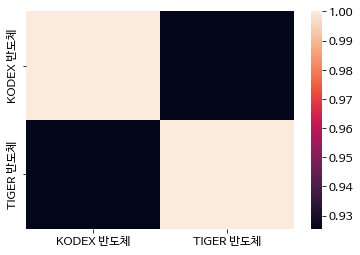

In [ ]:
import seaborn as sns

sns.heatmap(corr_mat_1) # 역시 같은 반도체 ETF이므로 상관관계는 매우 높음.

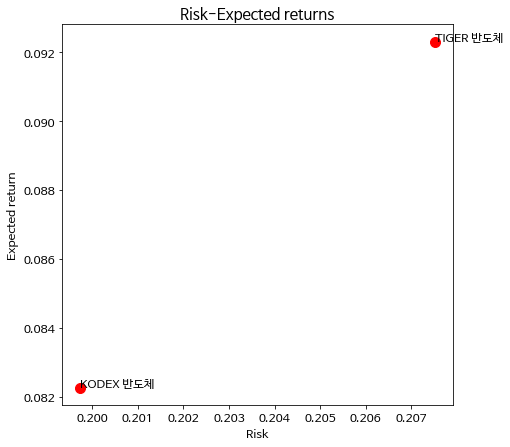

In [ ]:
# 반도체 ETF의 risk - expected return은?
symbols_1= ['KODEX 반도체', 'TIGER 반도체']
var_1 = np.diag(cov_mat_1)
plt.figure(figsize=(7,7))
plt.scatter(np.sqrt(var_1),exp_rets_1 ,s=100,color="red")
plt.xlabel("Risk")
plt.ylabel("Expected return")
plt.title("Risk-Expected returns",fontsize=15)
for i, label in enumerate(symbols_1):
    plt.text(np.sqrt(var_1)[i], exp_rets_1[i],label)

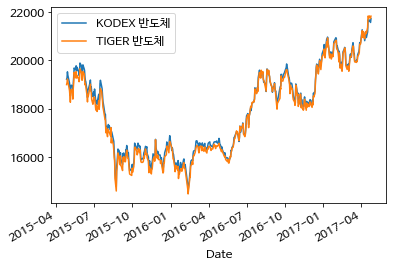

In [ ]:
data_1.plot()
plt.legend(loc='upper left')

In [ ]:
kk= data_1 / data_1.iloc[0]

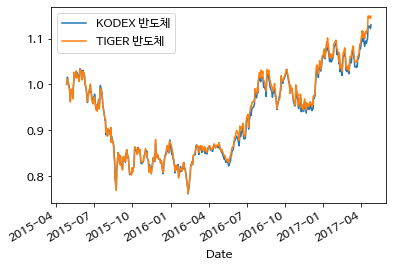

In [ ]:
kk.plot()

### 2) 고배당주 ETF

In [ ]:
symbols_2=['KOSEF 고배당','ARIRANG 고배당주', '파워 고배당저변동성', 'TIGER 코스피고배당', 'KINDEX 배당성장', 'TIGER 배당성장', 'KODEX 배당성장','마이티 코스피고배당', 'ARIRANG 미국다우존스고배당주(합성 H)']

In [ ]:
data_2=data[symbols_2]

In [ ]:
data_2

,KOSEF 고배당,ARIRANG 고배당주,파워 고배당저변동성,TIGER 코스피고배당,KINDEX 배당성장,TIGER 배당성장,KODEX 배당성장,마이티 코스피고배당,ARIRANG 미국다우존스고배당주(합성 H)
Date,,,,,,,,,
2015-04-27,7182,10642,25515,11052,30836,15049,12201,10912,9955
2015-04-28,7173,10567,25593,11030,30903,15017,12215,10912,9875
2015-04-29,7114,10540,25644,11130,30947,15092,12258,11039,9935
2015-04-30,7063,10495,25532,11053,30575,14923,12135,10907,9900
2015-05-04,7123,10504,25495,10966,30609,14942,12111,10907,9875
...,...,...,...,...,...,...,...,...,...
2017-04-19,7828,11647,27211,11393,31251,15504,12426,11519,11725
2017-04-20,7875,11713,27492,11407,31280,15499,12479,11557,11615
2017-04-21,7890,11727,27488,11454,31323,15523,12494,11599,11750


In [ ]:
data_2.isnull().sum()

KOSEF 고배당                   0
ARIRANG 고배당주                0
파워 고배당저변동성                  0
TIGER 코스피고배당                0
KINDEX 배당성장                 0
TIGER 배당성장                  0
KODEX 배당성장                  0
마이티 코스피고배당                  0
ARIRANG 미국다우존스고배당주(합성 H)    0
dtype: int64

In [ ]:
holding_periods=1
n_term=252

returns_2 = data_2.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets_2 = returns_2.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_2 = returns_2.cov() * n_term # covariance
corr_mat_2 = returns_2.corr() # corr

In [ ]:
returns_2

,KOSEF 고배당,ARIRANG 고배당주,파워 고배당저변동성,TIGER 코스피고배당,KINDEX 배당성장,TIGER 배당성장,KODEX 배당성장,마이티 코스피고배당,ARIRANG 미국다우존스고배당주(합성 H)
Date,,,,,,,,,
2015-04-28,-0.001253,-0.007048,0.003057,-0.001991,0.002173,-0.002126,0.001147,0.000000,-0.008036
2015-04-29,-0.008225,-0.002555,0.001993,0.009066,0.001424,0.004994,0.003520,0.011639,0.006076
2015-04-30,-0.007169,-0.004269,-0.004367,-0.006918,-0.012021,-0.011198,-0.010034,-0.011958,-0.003523
2015-05-04,0.008495,0.000858,-0.001449,-0.007871,0.001112,0.001273,-0.001978,0.000000,-0.002525
2015-05-06,-0.002667,-0.000381,-0.002903,-0.013679,-0.021432,-0.018471,-0.018413,-0.011185,-0.010633
...,...,...,...,...,...,...,...,...,...
2017-04-19,-0.008361,-0.002825,-0.001761,0.001318,-0.002935,-0.002445,-0.004247,0.004097,-0.000426
2017-04-20,0.006004,0.005667,0.010327,0.001229,0.000928,-0.000322,0.004265,0.003299,-0.009382
2017-04-21,0.001905,0.001195,-0.000145,0.004120,0.001375,0.001548,0.001202,0.003634,0.011623


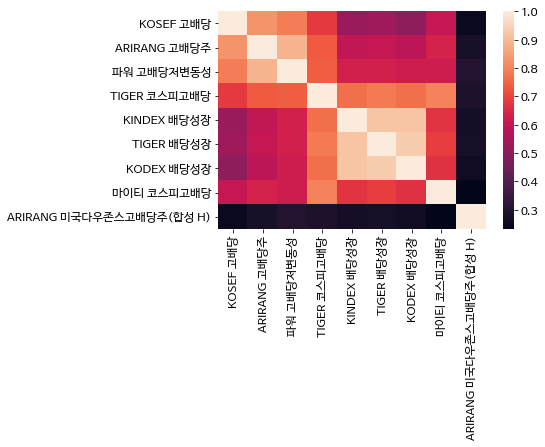

In [ ]:
sns.heatmap(corr_mat_2)

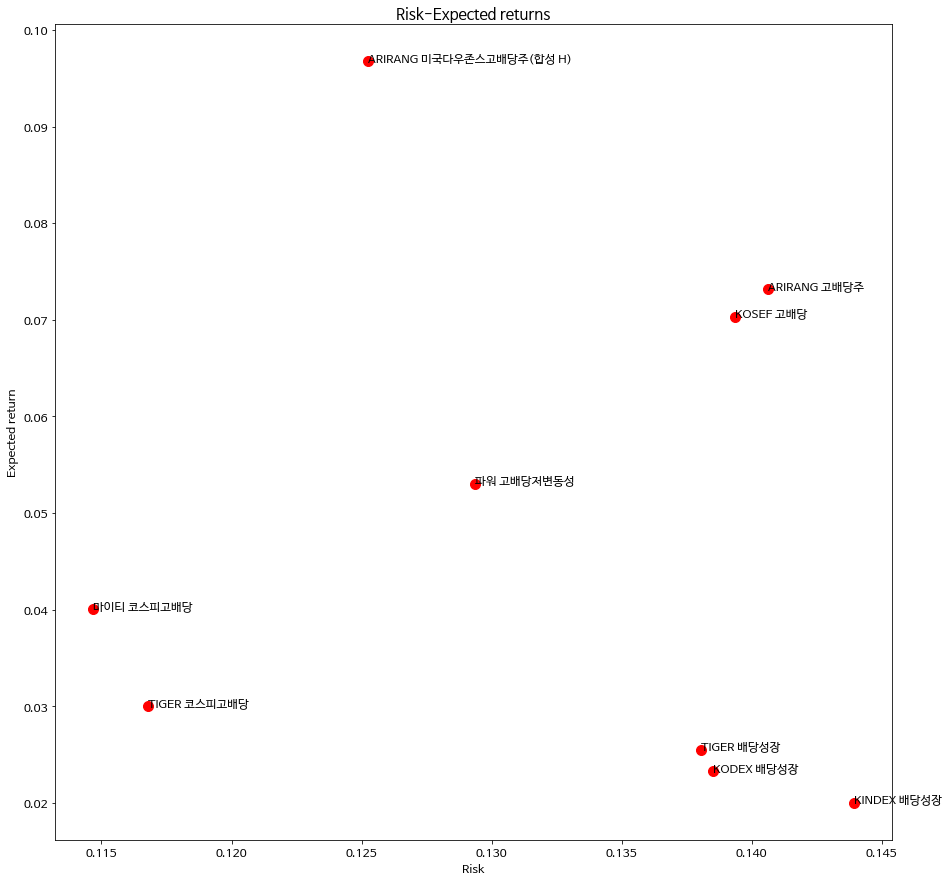

In [ ]:
# 고배당주 ETF의 risk - expected return은?
plt.figure(figsize=(15 ,15))
var_2 = np.diag(cov_mat_2)
plt.scatter(np.sqrt(var_2),exp_rets_2 ,s=100,color="red")
plt.xlabel("Risk")
plt.ylabel("Expected return")
plt.title("Risk-Expected returns",fontsize=15)
for i, label in enumerate(symbols_2):
    plt.text(np.sqrt(var_2)[i], exp_rets_2[i],label)

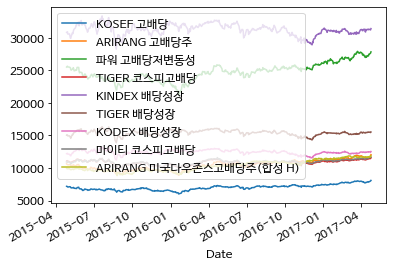

In [ ]:
data_2.plot()
plt.legend(loc='upper left')

In [ ]:
kk_2=data_2 / data_2.iloc[0]

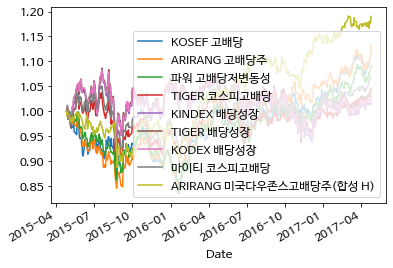

In [ ]:
kk_2.plot()

In [ ]:
# 고배당주 > low risk-low return, high risk-high return
symbols_2_mod = ['마이티 코스피고배당', 'ARIRANG 고배당주', 'ARIRANG 미국다우존스고배당주(합성 H)']

In [ ]:
data_2_mod = data[symbols_2_mod]

In [ ]:
holding_periods=1
n_term=252

returns_2_mod = data_2_mod.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets_2_mod = returns_2_mod.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_2_mod = returns_2_mod.cov() * n_term # covariance
corr_mat_2_mod = returns_2_mod.corr() # corr

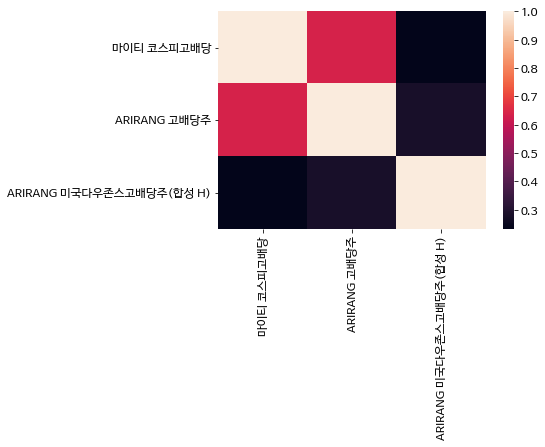

In [ ]:
sns.heatmap(corr_mat_2_mod)

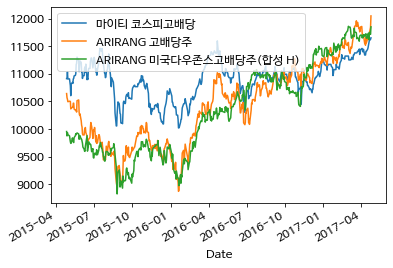

In [ ]:
data_2_mod.plot()
plt.legend(loc='upper left')

In [ ]:
kk_2_mod=data_2_mod / data_2_mod.iloc[0]

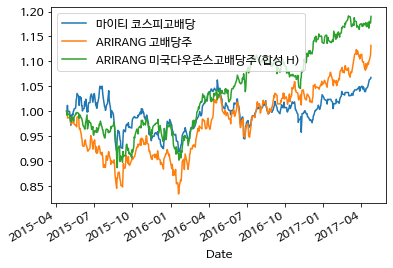

In [ ]:
kk_2_mod.plot()

In [ ]:
symbols = symbols_1 + symbols_2_mod

In [ ]:
data_total = data[symbols]

In [ ]:
data_total

,KODEX 반도체,TIGER 반도체,마이티 코스피고배당,ARIRANG 고배당주,ARIRANG 미국다우존스고배당주(합성 H)
Date,,,,,
2015-04-27,19223,18999,10912,10642,9955
2015-04-28,19277,19080,10912,10567,9875
2015-04-29,19527,19230,11039,10540,9935
2015-04-30,19389,19138,10907,10495,9900
2015-05-04,19061,18747,10907,10504,9875
...,...,...,...,...,...
2017-04-19,21642,21810,11519,11647,11725
2017-04-20,21628,21756,11557,11713,11615
2017-04-21,21672,21839,11599,11727,11750


### 3) 헬스케어 ETF

In [ ]:
symbols_3=['TIGER 헬스케어', 'TIGER 200 헬스케어']

In [ ]:
data_3 = data[symbols_3]

In [ ]:
data_3 

,TIGER 헬스케어,TIGER 200 헬스케어
Date,,
2015-04-27,22147,NaN
2015-04-28,22201,NaN
2015-04-29,22271,NaN
2015-04-30,22340,NaN
2015-05-04,22132,NaN
...,...,...
2017-04-19,23742,16998
2017-04-20,23926,17176
2017-04-21,23887,17147


In [ ]:
holding_periods=1
n_term=252

returns_3 = data_3.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_3.fillna(0.005/365, inplace=True)# 결측치 무위험 이자율로 채워주기
exp_rets_3 = returns_3.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_3 = returns_3.cov() * n_term # covariance
corr_mat_3 = returns_3.corr() # corr

In [ ]:
returns_3

,TIGER 헬스케어,TIGER 200 헬스케어
Date,,
2015-04-28,0.002438,0.000014
2015-04-29,0.003153,0.000014
2015-04-30,0.003098,0.000014
2015-05-04,-0.009311,0.000014
2015-05-06,-0.023315,0.000014
...,...,...
2017-04-19,0.002280,0.002359
2017-04-20,0.007750,0.010472
2017-04-21,-0.001630,-0.001688


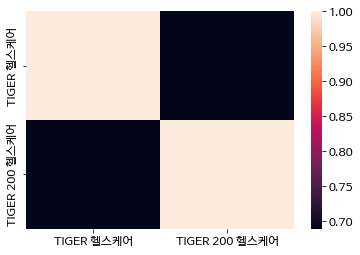

In [ ]:
sns.heatmap(corr_mat_3)

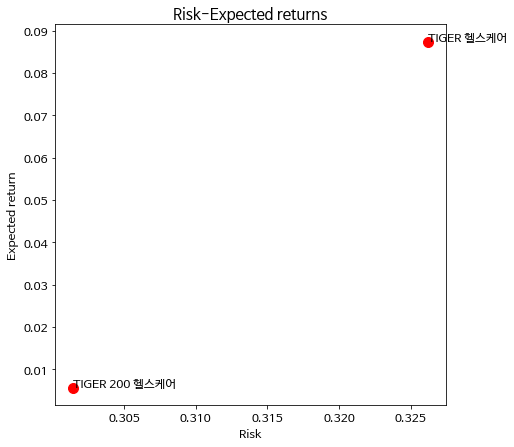

In [ ]:
# 헬스케어 ETF의 risk - expected return은?
var_3 = np.diag(cov_mat_3)
plt.figure(figsize=(7,7))
plt.scatter(np.sqrt(var_3),exp_rets_3 ,s=100,color="red")
plt.xlabel("Risk")
plt.ylabel("Expected return")
plt.title("Risk-Expected returns",fontsize=15)
for i, label in enumerate(symbols_3):
    plt.text(np.sqrt(var_3)[i], exp_rets_3[i],label)

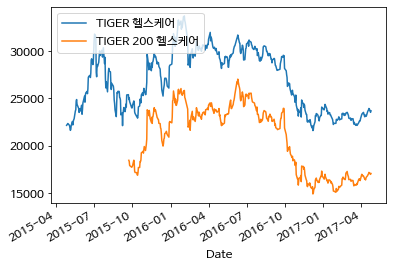

In [ ]:
data_3.plot()
plt.legend(loc='upper left')

In [ ]:
kk_3= data_3 / data_3.iloc[0]

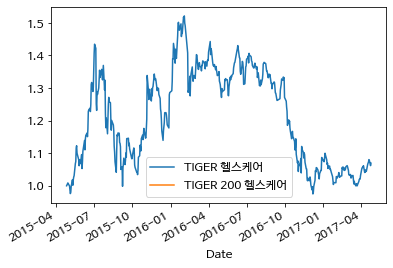

In [ ]:
kk_3.plot()

### 4) S&P 지수

In [ ]:
symbols_4 = ['흥국 S&P코리아로우볼']

In [ ]:
data_4 = data[symbols_4]

In [ ]:
data_4

,흥국 S&P코리아로우볼
Date,
2015-04-27,10745
2015-04-28,10773
2015-04-29,10778
2015-04-30,10773
2015-05-04,10768
...,...
2017-04-19,11000
2017-04-20,11024
2017-04-21,11110


In [ ]:
holding_periods=1
n_term=252

returns_4 = data_4.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets_4 = returns_4.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_4 = returns_4.cov() * n_term # covariance
corr_mat_4 = returns_4.corr() # corr

In [ ]:
returns_4

,흥국 S&P코리아로우볼
Date,
2015-04-28,0.002606
2015-04-29,0.000464
2015-04-30,-0.000464
2015-05-04,-0.000464
2015-05-06,-0.012166
...,...
2017-04-19,0.000455
2017-04-20,0.002182
2017-04-21,0.007801


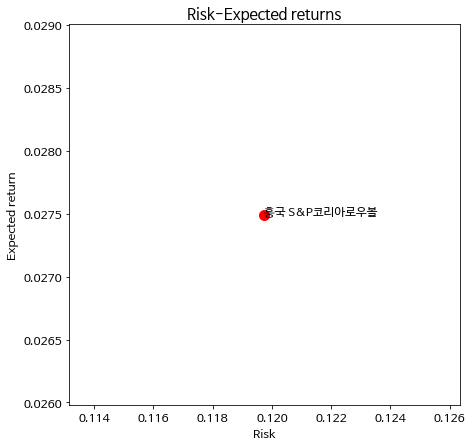

In [ ]:
# S&P ETF의 risk - expected return은?
var_4 = np.diag(cov_mat_4)
plt.figure(figsize=(7,7))
plt.scatter(np.sqrt(var_4),exp_rets_4 ,s=100,color="red")
plt.xlabel("Risk")
plt.ylabel("Expected return")
plt.title("Risk-Expected returns",fontsize=15)
for i, label in enumerate(symbols_4):
    plt.text(np.sqrt(var_4)[i], exp_rets_4[i],label)

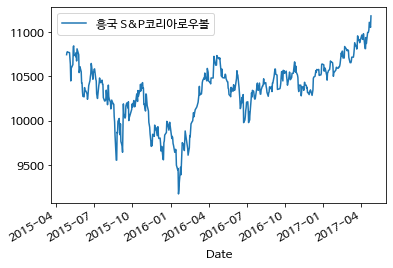

In [ ]:
data_4.plot()
plt.legend(loc='upper left')

# 2. 투자 기회 집합

In [ ]:
data_total = data[symbols_1 + symbols_2_mod + symbols_3 + symbols_4]

In [ ]:
data_total.columns

Index(['KODEX 반도체', 'TIGER 반도체', '마이티 코스피고배당', 'ARIRANG 고배당주',
       'ARIRANG 미국다우존스고배당주(합성 H)', 'TIGER 헬스케어', 'TIGER 200 헬스케어',
       '흥국 S&P코리아로우볼'],
      dtype='object')

In [ ]:
data_total

,KODEX 반도체,TIGER 반도체,마이티 코스피고배당,ARIRANG 고배당주,ARIRANG 미국다우존스고배당주(합성 H),TIGER 헬스케어,TIGER 200 헬스케어,흥국 S&P코리아로우볼
Date,,,,,,,,
2015-04-27,19223,18999,10912,10642,9955,22147,NaN,10745
2015-04-28,19277,19080,10912,10567,9875,22201,NaN,10773
2015-04-29,19527,19230,11039,10540,9935,22271,NaN,10778
2015-04-30,19389,19138,10907,10495,9900,22340,NaN,10773
2015-05-04,19061,18747,10907,10504,9875,22132,NaN,10768
...,...,...,...,...,...,...,...,...
2017-04-19,21642,21810,11519,11647,11725,23742,16998,11000
2017-04-20,21628,21756,11557,11713,11615,23926,17176,11024
2017-04-21,21672,21839,11599,11727,11750,23887,17147,11110


In [ ]:
holding_periods=1
n_term=252

returns_total = data_total.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_total.fillna(0.005/365, inplace=True)
exp_rets_total = returns_total.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_total = returns_total.cov() * n_term # covariance
corr_mat_total = returns_total.corr() # corr

In [ ]:
returns_total

,KODEX 반도체,TIGER 반도체,마이티 코스피고배당,ARIRANG 고배당주,ARIRANG 미국다우존스고배당주(합성 H),TIGER 헬스케어,TIGER 200 헬스케어,흥국 S&P코리아로우볼
Date,,,,,,,,
2015-04-28,0.002809,0.004263,0.000000,-0.007048,-0.008036,0.002438,0.000014,0.002606
2015-04-29,0.012969,0.007862,0.011639,-0.002555,0.006076,0.003153,0.000014,0.000464
2015-04-30,-0.007067,-0.004784,-0.011958,-0.004269,-0.003523,0.003098,0.000014,-0.000464
2015-05-04,-0.016917,-0.020431,0.000000,0.000858,-0.002525,-0.009311,0.000014,-0.000464
2015-05-06,-0.027543,-0.025497,-0.011185,-0.000381,-0.010633,-0.023315,0.000014,-0.012166
...,...,...,...,...,...,...,...,...
2017-04-19,-0.001384,-0.000870,0.004097,-0.002825,-0.000426,0.002280,0.002359,0.000455
2017-04-20,-0.000647,-0.002476,0.003299,0.005667,-0.009382,0.007750,0.010472,0.002182
2017-04-21,0.002034,0.003815,0.003634,0.001195,0.011623,-0.001630,-0.001688,0.007801


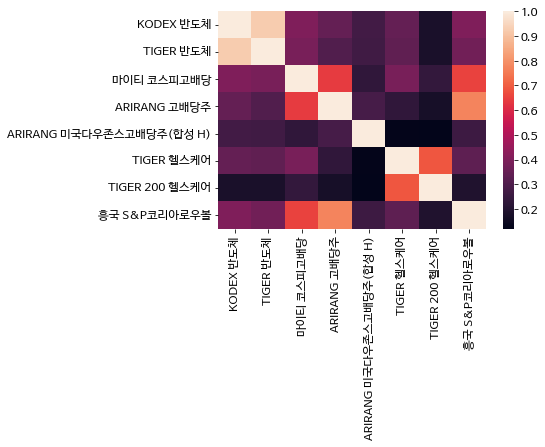

In [ ]:
plt.rc('font', size=12)
sns.heatmap(corr_mat_total)

In [ ]:
# ETF의 상관관계가 0.4 이하인 것
corr_mat_total[corr_mat_total <=0.35]

,KODEX 반도체,TIGER 반도체,마이티 코스피고배당,ARIRANG 고배당주,ARIRANG 미국다우존스고배당주(합성 H),TIGER 헬스케어,TIGER 200 헬스케어,흥국 S&P코리아로우볼
KODEX 반도체,NaN,NaN,NaN,0.348839,0.274256,0.347807,0.181653,NaN
TIGER 반도체,NaN,NaN,NaN,0.308921,0.269015,0.338846,0.180418,NaN
마이티 코스피고배당,NaN,NaN,NaN,NaN,0.232463,NaN,0.238779,NaN
ARIRANG 고배당주,0.348839,0.308921,NaN,NaN,0.282387,0.231049,0.172039,NaN
ARIRANG 미국다우존스고배당주(합성 H),0.274256,0.269015,0.232463,0.282387,NaN,0.125463,0.119986,0.263304
TIGER 헬스케어,0.347807,0.338846,NaN,0.231049,0.125463,NaN,NaN,0.336283
TIGER 200 헬스케어,0.181653,0.180418,0.238779,0.172039,0.119986,NaN,NaN,0.195506
흥국 S&P코리아로우볼,NaN,NaN,NaN,NaN,0.263304,0.336283,0.195506,NaN


In [ ]:
p1 = ['KODEX 반도체', 'ARIRANG 고배당주']
p2 = ['KODEX 반도체', 'ARIRANG 미국다우존스고배당주(합성 H)']
p3 = ['KODEX 반도체', 'TIGER 헬스케어']
p4 = ['KODEX 반도체', 'TIGER 200 헬스케어']
p5 = ['마이티 코스피고배당', 'ARIRANG 미국다우존스고배당주(합성 H)']
p6 = ['마이티 코스피고배당', 'TIGER 200 헬스케어']
p7 = ['ARIRANG 고배당주', 'ARIRANG 미국다우존스고배당주(합성 H)']
p8 = ['ARIRANG 고배당주', 'TIGER 헬스케어']
p9 = ['ARIRANG 고배당주', 'TIGER 200 헬스케어']
p10 = ['ARIRANG 미국다우존스고배당주(합성 H)', 'TIGER 헬스케어']
p11 = ['ARIRANG 미국다우존스고배당주(합성 H)', 'TIGER 200 헬스케어']
p12 = ['ARIRANG 미국다우존스고배당주(합성 H)', '흥국 S&P코리아로우볼']
p13 = ['TIGER 헬스케어', '흥국 S&P코리아로우볼']
p14 = ['TIGER 200 헬스케어', '흥국 S&P코리아로우볼']

In [ ]:
p1 = data[p1]
p2 = data[p2]
p3 = data[p3]
p4 = data[p4]
p5 = data[p5]
p6 = data[p6]
p7 = data[p7]
p8 = data[p8]
p9 = data[p9]
p10 = data[p10]
p11 = data[p11]
p12 = data[p12]
p13 = data[p13]
p14 = data[p14]

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))


    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

### p1

In [ ]:
#p1
holding_periods=1
n_term=252

returns_p1 = p1.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p1.fillna(0.005/365, inplace=True)
exp_rets_p1 = returns_p1.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p1 = returns_p1.cov() * n_term # covariance
corr_mat_p1 = returns_p1.corr() # corr

max_risk=0.5
max_ret_p1 = exp_rets_p1.max()
min_ret_p1 = exp_rets_p1[exp_rets_p1 > 0].min()

n_step = 100
step_diff = (max_ret_p1 - min_ret_p1)/n_step

risks_p1 = []
rets_p1 = []
weights_p1 = []

for step in range(0, n_step+1):
    target_ret_p1 = min_ret_p1 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p1, exp_rets_p1, target_ret_p1) # 최적화를 돌려서 나온 _w임.
    risk_p1 = np.sqrt(np.dot(np.dot(_w, cov_mat_p1), _w))

    if risk_p1 > max_risk:
        break

    risks_p1.append(risk_p1)
    ret_p1 = np.dot(exp_rets_p1, _w)
    rets_p1.append(ret_p1)
    weights_p1.append(_w)

# min_risk_ret
min_risk_idx_p1 = np.argmin(risks_p1)
min_risk_p1 = risks_p1[min_risk_idx_p1]
min_risk_ret_p1 = rets_p1[min_risk_idx_p1]

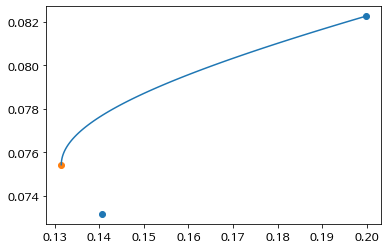

In [ ]:
# efficient frontier & min_risk_ret
plt.plot(risks_p1, rets_p1)

var_p1 = np.diag(cov_mat_p1)
plt.scatter(np.sqrt(var_p1), exp_rets_p1)
plt.scatter(min_risk_p1, min_risk_ret_p1)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p1 = []

# ToDo
for i in range(len(rets_p1)):
    slope_ = (rets_p1[i] - rf_rate) / risks_p1[i]
    slopes_p1.append(slope_)

max_tangency_idx_p1 = np.argmax(slopes_p1)
max_tangency_p1 = slopes_p1[max_tangency_idx_p1]

In [ ]:
max_tangency_risk_p1 = risks_p1[max_tangency_idx_p1]
max_tangency_return_p1 = rets_p1[max_tangency_idx_p1]
max_tangency_weight_p1 = weights_p1[max_tangency_idx_p1]

print("Risk of tangency portfolio : ", max_tangency_risk_p1)
print("Return of tangency portfolio : ", max_tangency_return_p1)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p1 - rf_rate) / max_tangency_risk_p1)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p1)

Risk of tangency portfolio :  0.13189298997219318
Return of tangency portfolio :  0.07589891544269915
Sharpe ratio of tangency portfolio :  0.5375487769110904
Weight of minimum variance portfolio : 
KODEX 반도체       0.300001
ARIRANG 고배당주    0.699999
dtype: float64


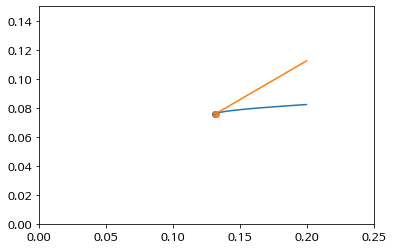

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p1 = []
for i in range(len(risks_p1)):
    ys_p1.append(max_tangency_p1 * risks_p1[i] + rf_rate)

plt.plot(risks_p1, rets_p1)
plt.plot(risks_p1, ys_p1)
plt.scatter(min_risk_p1, min_risk_ret_p1)
plt.scatter(max_tangency_risk_p1, max_tangency_return_p1)
plt.xlim([0, 0.25])
plt.ylim([0, 0.15])
plt.show()

### p2

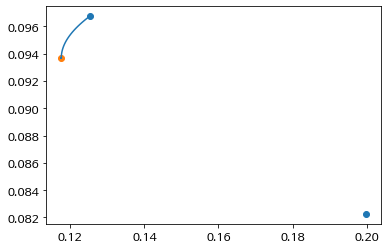

In [ ]:
#p2
holding_periods=1
n_term=252

returns_p2 = p2.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p2.fillna(0.005/365, inplace=True)
exp_rets_p2 = returns_p2.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p2 = returns_p2.cov() * n_term # covariance
corr_mat_p2 = returns_p2.corr() # corr

max_risk=0.5
max_ret_p2 = exp_rets_p2.max()
min_ret_p2 = exp_rets_p2[exp_rets_p2 > 0].min()

n_step = 100
step_diff = (max_ret_p2 - min_ret_p2)/n_step

risks_p2 = []
rets_p2 = []
weights_p2 = []

for step in range(0, n_step+1):
    target_ret_p2 = min_ret_p2 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p2, exp_rets_p2, target_ret_p2) # 최적화를 돌려서 나온 _w임.
    risk_p2 = np.sqrt(np.dot(np.dot(_w, cov_mat_p2), _w))

    if risk_p2 > max_risk:
        break

    risks_p2.append(risk_p2)
    ret_p2 = np.dot(exp_rets_p2, _w)
    rets_p2.append(ret_p2)
    weights_p2.append(_w)

# min_risk_ret
min_risk_idx_p2 = np.argmin(risks_p2)
min_risk_p2 = risks_p2[min_risk_idx_p2]
min_risk_ret_p2 = rets_p2[min_risk_idx_p2]

# efficient frontier & min_risk_ret
plt.plot(risks_p2, rets_p2)

var_p2 = np.diag(cov_mat_p2)
plt.scatter(np.sqrt(var_p2), exp_rets_p2)
plt.scatter(min_risk_p2, min_risk_ret_p2)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p2 = []

# ToDo
for i in range(len(rets_p2)):
    slope_ = (rets_p2[i] - rf_rate) / risks_p2[i]
    slopes_p2.append(slope_)

max_tangency_idx_p2 = np.argmax(slopes_p2)
max_tangency_p2 = slopes_p2[max_tangency_idx_p2]

max_tangency_risk_p2 = risks_p2[max_tangency_idx_p2]
max_tangency_return_p2 = rets_p2[max_tangency_idx_p2]
max_tangency_weight_p2 = weights_p2[max_tangency_idx_p2]

print("Risk of tangency portfolio : ", max_tangency_risk_p2)
print("Return of tangency portfolio : ", max_tangency_return_p2)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p2 - rf_rate) / max_tangency_risk_p2)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p2)

Risk of tangency portfolio :  0.11804364140757773
Return of tangency portfolio :  0.09442531138225126
Sharpe ratio of tangency portfolio :  0.7575614435129638
Weight of minimum variance portfolio : 
KODEX 반도체                   0.16
ARIRANG 미국다우존스고배당주(합성 H)    0.84
dtype: float64


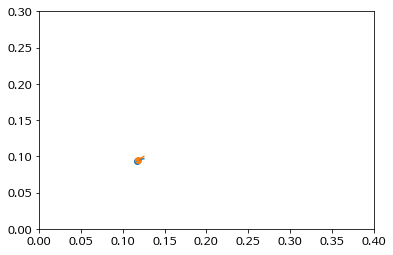

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p2 = []
for i in range(len(risks_p2)):
    ys_p2.append(max_tangency_p2 * risks_p2[i] + rf_rate)

plt.plot(risks_p2, rets_p2)
plt.plot(risks_p2, ys_p2)
plt.scatter(min_risk_p2, min_risk_ret_p2)
plt.scatter(max_tangency_risk_p2, max_tangency_return_p2)
plt.xlim([0, 0.40])
plt.ylim([0, 0.30])
plt.show()

### p3

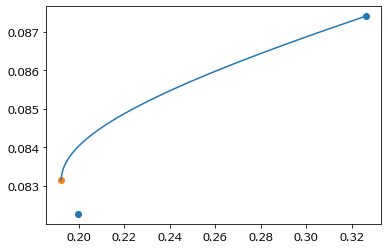

In [ ]:
#p3
holding_periods=1
n_term=252

returns_p3 = p3.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p3.fillna(0.005/365, inplace=True)
exp_rets_p3 = returns_p3.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p3 = returns_p3.cov() * n_term # covariance
corr_mat_p3 = returns_p3.corr() # corr

max_risk=0.5
max_ret_p3 = exp_rets_p3.max()
min_ret_p3 = exp_rets_p3[exp_rets_p3 > 0].min()

n_step = 100
step_diff = (max_ret_p3 - min_ret_p3)/n_step

risks_p3 = []
rets_p3 = []
weights_p3 = []

for step in range(0, n_step+1):
    target_ret_p3 = min_ret_p3 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p3, exp_rets_p3, target_ret_p3) # 최적화를 돌려서 나온 _w임.
    risk_p3 = np.sqrt(np.dot(np.dot(_w, cov_mat_p3), _w))

    if risk_p3 > max_risk:
        break

    risks_p3.append(risk_p3)
    ret_p3 = np.dot(exp_rets_p3, _w)
    rets_p3.append(ret_p3)
    weights_p3.append(_w)

# min_risk_ret
min_risk_idx_p3 = np.argmin(risks_p3)
min_risk_p3 = risks_p3[min_risk_idx_p3]
min_risk_ret_p3 = rets_p3[min_risk_idx_p3]

# efficient frontier & min_risk_ret
plt.plot(risks_p3, rets_p3)

var_p3 = np.diag(cov_mat_p3)
plt.scatter(np.sqrt(var_p3), exp_rets_p3)
plt.scatter(min_risk_p3, min_risk_ret_p3)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p3 = []

# ToDo
for i in range(len(rets_p3)):
    slope_ = (rets_p3[i] - rf_rate) / risks_p3[i]
    slopes_p3.append(slope_)

max_tangency_idx_p3 = np.argmax(slopes_p3)
max_tangency_p3 = slopes_p3[max_tangency_idx_p3]

max_tangency_risk_p3 = risks_p3[max_tangency_idx_p3]
max_tangency_return_p3 = rets_p3[max_tangency_idx_p3]
max_tangency_weight_p3 = weights_p3[max_tangency_idx_p3]

print("Risk of tangency portfolio : ", max_tangency_risk_p3)
print("Return of tangency portfolio : ", max_tangency_return_p3)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p3 - rf_rate) / max_tangency_risk_p3)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p3)

Risk of tangency portfolio :  0.19232681157093043
Return of tangency portfolio :  0.08324057884480968
Sharpe ratio of tangency portfolio :  0.4068105648179709
Weight of minimum variance portfolio : 
KODEX 반도체     0.809999
TIGER 헬스케어    0.190001
dtype: float64


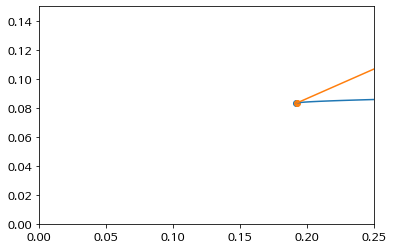

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p3 = []
for i in range(len(risks_p3)):
    ys_p3.append(max_tangency_p3 * risks_p3[i] + rf_rate)

plt.plot(risks_p3, rets_p3)
plt.plot(risks_p3, ys_p3)
plt.scatter(min_risk_p3, min_risk_ret_p3)
plt.scatter(max_tangency_risk_p3, max_tangency_return_p3)
plt.xlim([0, 0.25])
plt.ylim([0, 0.15])
plt.show()

### p4

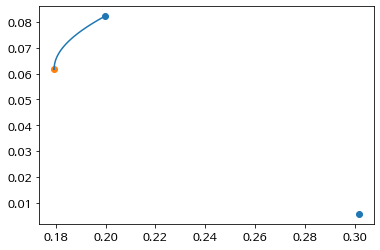

In [ ]:
#p4
holding_periods=1
n_term=252

returns_p4 = p4.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p4.fillna(0.005/365, inplace=True)
exp_rets_p4 = returns_p4.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p4 = returns_p4.cov() * n_term # covariance
corr_mat_p4 = returns_p4.corr() # corr

max_risk=0.5
max_ret_p4 = exp_rets_p4.max()
min_ret_p4 = exp_rets_p4[exp_rets_p4 > 0].min()

n_step = 100
step_diff = (max_ret_p4 - min_ret_p4)/n_step

risks_p4 = []
rets_p4 = []
weights_p4 = []

for step in range(0, n_step+1):
    target_ret_p4 = min_ret_p4 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p4, exp_rets_p4, target_ret_p4) # 최적화를 돌려서 나온 _w임.
    risk_p4 = np.sqrt(np.dot(np.dot(_w, cov_mat_p4), _w))

    if risk_p4 > max_risk:
        break

    risks_p4.append(risk_p4)
    ret_p4 = np.dot(exp_rets_p4, _w)
    rets_p4.append(ret_p4)
    weights_p4.append(_w)

# min_risk_ret
min_risk_idx_p4 = np.argmin(risks_p4)
min_risk_p4 = risks_p4[min_risk_idx_p4]
min_risk_ret_p4 = rets_p4[min_risk_idx_p4]

# efficient frontier & min_risk_ret
plt.plot(risks_p4, rets_p4)

var_p4 = np.diag(cov_mat_p4)
plt.scatter(np.sqrt(var_p4), exp_rets_p4)
plt.scatter(min_risk_p4, min_risk_ret_p4)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p4 = []

# ToDo
for i in range(len(rets_p4)):
    slope_ = (rets_p4[i] - rf_rate) / risks_p4[i]
    slopes_p4.append(slope_)

max_tangency_idx_p4 = np.argmax(slopes_p4)
max_tangency_p4 = slopes_p4[max_tangency_idx_p4]

max_tangency_risk_p4 = risks_p4[max_tangency_idx_p4]
max_tangency_return_p4 = rets_p4[max_tangency_idx_p4]
max_tangency_weight_p4 = weights_p4[max_tangency_idx_p4]

print("Risk of tangency portfolio : ", max_tangency_risk_p4)
print("Return of tangency portfolio : ", max_tangency_return_p4)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p4 - rf_rate) / max_tangency_risk_p4)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p4)

Risk of tangency portfolio :  0.1997317584033453
Return of tangency portfolio :  0.08226159571802871
Sharpe ratio of tangency portfolio :  0.38682679377409745
Weight of minimum variance portfolio : 
KODEX 반도체         1.000000e+00
TIGER 200 헬스케어    1.774165e-10
dtype: float64


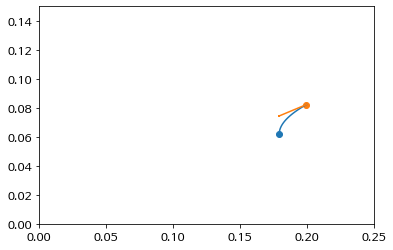

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p4 = []
for i in range(len(risks_p4)):
    ys_p4.append(max_tangency_p4 * risks_p4[i] + rf_rate)

plt.plot(risks_p4, rets_p4)
plt.plot(risks_p4, ys_p4)
plt.scatter(min_risk_p4, min_risk_ret_p4)
plt.scatter(max_tangency_risk_p4, max_tangency_return_p4)
plt.xlim([0, 0.25])
plt.ylim([0, 0.15])
plt.show()

### p5

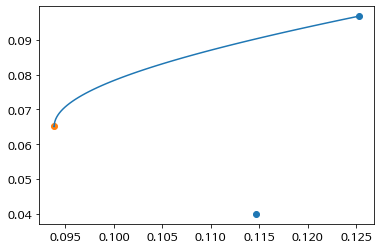

In [ ]:
#p5
holding_periods=1
n_term=252

returns_p5 = p5.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p5.fillna(0.005/365, inplace=True)
exp_rets_p5 = returns_p5.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p5 = returns_p5.cov() * n_term # covariance
corr_mat_p5 = returns_p5.corr() # corr

max_risk=0.5
max_ret_p5 = exp_rets_p5.max()
min_ret_p5 = exp_rets_p5[exp_rets_p5 > 0].min()

n_step = 100
step_diff = (max_ret_p5 - min_ret_p5)/n_step

risks_p5 = []
rets_p5 = []
weights_p5 = []

for step in range(0, n_step+1):
    target_ret_p5 = min_ret_p5 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p5, exp_rets_p5, target_ret_p5) # 최적화를 돌려서 나온 _w임.
    risk_p5 = np.sqrt(np.dot(np.dot(_w, cov_mat_p5), _w))

    if risk_p5 > max_risk:
        break

    risks_p5.append(risk_p5)
    ret_p5 = np.dot(exp_rets_p5, _w)
    rets_p5.append(ret_p5)
    weights_p5.append(_w)

# min_risk_ret
min_risk_idx_p5 = np.argmin(risks_p5)
min_risk_p5 = risks_p5[min_risk_idx_p5]
min_risk_ret_p5 = rets_p5[min_risk_idx_p5]

# efficient frontier & min_risk_ret
plt.plot(risks_p5, rets_p5)

var_p5 = np.diag(cov_mat_p5)
plt.scatter(np.sqrt(var_p5), exp_rets_p5)
plt.scatter(min_risk_p5, min_risk_ret_p5)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p5 = []

# ToDo
for i in range(len(rets_p5)):
    slope_ = (rets_p5[i] - rf_rate) / risks_p5[i]
    slopes_p5.append(slope_)

max_tangency_idx_p5 = np.argmax(slopes_p5)
max_tangency_p5 = slopes_p5[max_tangency_idx_p5]

max_tangency_risk_p5 = risks_p5[max_tangency_idx_p5]
max_tangency_return_p5 = rets_p5[max_tangency_idx_p5]
max_tangency_weight_p5 = weights_p5[max_tangency_idx_p5]

print("Risk of tangency portfolio : ", max_tangency_risk_p5)
print("Return of tangency portfolio : ", max_tangency_return_p5)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p5 - rf_rate) / max_tangency_risk_p5)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p5)

Risk of tangency portfolio :  0.1093606698361595
Return of tangency portfolio :  0.08653183206483073
Sharpe ratio of tangency portfolio :  0.7455315716973844
Weight of minimum variance portfolio : 
마이티 코스피고배당                  0.179997
ARIRANG 미국다우존스고배당주(합성 H)    0.820003
dtype: float64


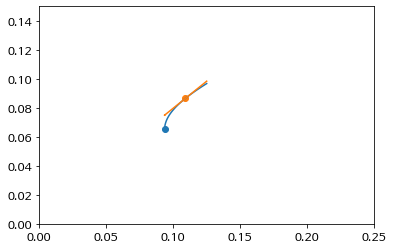

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p5 = []
for i in range(len(risks_p5)):
    ys_p5.append(max_tangency_p5 * risks_p5[i] + rf_rate)

plt.plot(risks_p5, rets_p5)
plt.plot(risks_p5, ys_p5)
plt.scatter(min_risk_p5, min_risk_ret_p5)
plt.scatter(max_tangency_risk_p5, max_tangency_return_p5)
plt.xlim([0, 0.25])
plt.ylim([0, 0.15])
plt.show()

### p6

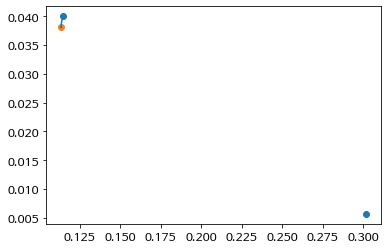

In [ ]:
#p6
holding_periods=1
n_term=252

returns_p6 = p6.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p6.fillna(0.005/365, inplace=True)
exp_rets_p6 = returns_p6.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p6 = returns_p6.cov() * n_term # covariance
corr_mat_p6 = returns_p6.corr() # corr

max_risk=0.5
max_ret_p6 = exp_rets_p6.max()
min_ret_p6 = exp_rets_p6[exp_rets_p6 > 0].min()

n_step = 100
step_diff = (max_ret_p6 - min_ret_p6)/n_step

risks_p6 = []
rets_p6 = []
weights_p6 = []

for step in range(0, n_step+1):
    target_ret_p6 = min_ret_p6 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p6, exp_rets_p6, target_ret_p6) # 최적화를 돌려서 나온 _w임.
    risk_p6 = np.sqrt(np.dot(np.dot(_w, cov_mat_p6), _w))

    if risk_p6 > max_risk:
        break

    risks_p6.append(risk_p6)
    ret_p6 = np.dot(exp_rets_p6, _w)
    rets_p6.append(ret_p6)
    weights_p6.append(_w)

# min_risk_ret
min_risk_idx_p6 = np.argmin(risks_p6)
min_risk_p6 = risks_p6[min_risk_idx_p6]
min_risk_ret_p6 = rets_p6[min_risk_idx_p6]

# efficient frontier & min_risk_ret
plt.plot(risks_p6, rets_p6)

var_p6 = np.diag(cov_mat_p6)
plt.scatter(np.sqrt(var_p6), exp_rets_p6)
plt.scatter(min_risk_p6, min_risk_ret_p6)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p6 = []

# ToDo
for i in range(len(rets_p6)):
    slope_ = (rets_p6[i] - rf_rate) / risks_p6[i]
    slopes_p6.append(slope_)

max_tangency_idx_p6 = np.argmax(slopes_p6)
max_tangency_p6 = slopes_p6[max_tangency_idx_p6]

max_tangency_risk_p6 = risks_p6[max_tangency_idx_p6]
max_tangency_return_p6 = rets_p6[max_tangency_idx_p6]
max_tangency_weight_p6 = weights_p6[max_tangency_idx_p6]

print("Risk of tangency portfolio : ", max_tangency_risk_p6)
print("Return of tangency portfolio : ", max_tangency_return_p6)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p6 - rf_rate) / max_tangency_risk_p6)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p6)

Risk of tangency portfolio :  0.11467331834494011
Return of tangency portfolio :  0.04001707212959835
Sharpe ratio of tangency portfolio :  0.30536372920042437
Weight of minimum variance portfolio : 
마이티 코스피고배당        1.000000e+00
TIGER 200 헬스케어    3.576505e-09
dtype: float64


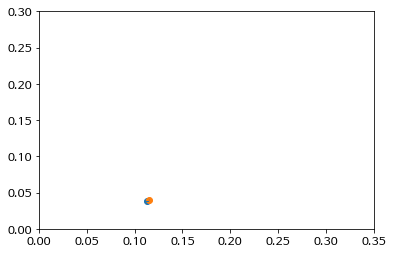

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p6 = []
for i in range(len(risks_p6)):
    ys_p6.append(max_tangency_p6 * risks_p6[i] + rf_rate)

plt.plot(risks_p6, rets_p6)
plt.plot(risks_p6, ys_p6)
plt.scatter(min_risk_p6, min_risk_ret_p6)
plt.scatter(max_tangency_risk_p6, max_tangency_return_p6)
plt.xlim([0, 0.35])
plt.ylim([0, 0.30])
plt.show()

### p7

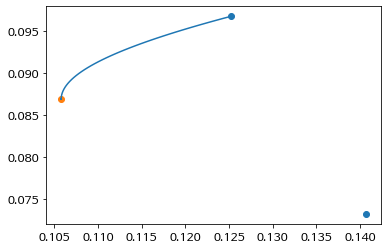

In [ ]:
#p7
holding_periods=1
n_term=252

returns_p7 = p7.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p7.fillna(0.005/365, inplace=True)
exp_rets_p7 = returns_p7.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p7 = returns_p7.cov() * n_term # covariance
corr_mat_p7 = returns_p7.corr() # corr

max_risk=0.5
max_ret_p7 = exp_rets_p7.max()
min_ret_p7 = exp_rets_p7[exp_rets_p7 > 0].min()

n_step = 100
step_diff = (max_ret_p7 - min_ret_p7)/n_step

risks_p7 = []
rets_p7 = []
weights_p7 = []

for step in range(0, n_step+1):
    target_ret_p7 = min_ret_p7 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p7, exp_rets_p7, target_ret_p7) # 최적화를 돌려서 나온 _w임.
    risk_p7 = np.sqrt(np.dot(np.dot(_w, cov_mat_p7), _w))

    if risk_p7 > max_risk:
        break

    risks_p7.append(risk_p7)
    ret_p7 = np.dot(exp_rets_p7, _w)
    rets_p7.append(ret_p7)
    weights_p7.append(_w)

# min_risk_ret
min_risk_idx_p7 = np.argmin(risks_p7)
min_risk_p7 = risks_p7[min_risk_idx_p7]
min_risk_ret_p7 = rets_p7[min_risk_idx_p7]

# efficient frontier & min_risk_ret
plt.plot(risks_p7, rets_p7)

var_p7 = np.diag(cov_mat_p7)
plt.scatter(np.sqrt(var_p7), exp_rets_p7)
plt.scatter(min_risk_p7, min_risk_ret_p7)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p7 = []

# ToDo
for i in range(len(rets_p7)):
    slope_ = (rets_p7[i] - rf_rate) / risks_p7[i]
    slopes_p7.append(slope_)

max_tangency_idx_p7 = np.argmax(slopes_p7)
max_tangency_p7 = slopes_p7[max_tangency_idx_p7]

max_tangency_risk_p7 = risks_p7[max_tangency_idx_p7]
max_tangency_return_p7 = rets_p7[max_tangency_idx_p7]
max_tangency_weight_p7 = weights_p7[max_tangency_idx_p7]

print("Risk of tangency portfolio : ", max_tangency_risk_p7)
print("Return of tangency portfolio : ", max_tangency_return_p7)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p7 - rf_rate) / max_tangency_risk_p7)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p7)

Risk of tangency portfolio :  0.10779266099889781
Return of tangency portfolio :  0.08990687960603361
Sharpe ratio of tangency portfolio :  0.787687017086458
Weight of minimum variance portfolio : 
ARIRANG 고배당주                0.289999
ARIRANG 미국다우존스고배당주(합성 H)    0.710001
dtype: float64


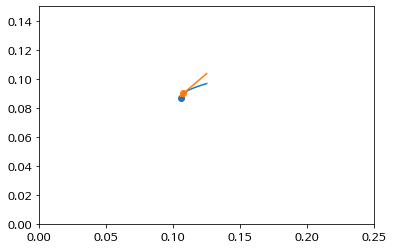

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p7 = []
for i in range(len(risks_p7)):
    ys_p7.append(max_tangency_p7 * risks_p7[i] + rf_rate)

plt.plot(risks_p7, rets_p7)
plt.plot(risks_p7, ys_p7)
plt.scatter(min_risk_p7, min_risk_ret_p7)
plt.scatter(max_tangency_risk_p7, max_tangency_return_p7)
plt.xlim([0, 0.25])
plt.ylim([0, 0.15])
plt.show()

### p8

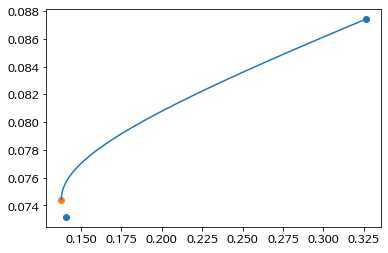

In [ ]:
#p8
holding_periods=1
n_term=252

returns_p8 = p8.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p8.fillna(0.005/365, inplace=True)
exp_rets_p8 = returns_p8.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p8 = returns_p8.cov() * n_term # covariance
corr_mat_p8 = returns_p8.corr() # corr

max_risk=0.5
max_ret_p8 = exp_rets_p8.max()
min_ret_p8 = exp_rets_p8[exp_rets_p8 > 0].min()

n_step = 100
step_diff = (max_ret_p8 - min_ret_p8)/n_step

risks_p8 = []
rets_p8 = []
weights_p8 = []

for step in range(0, n_step+1):
    target_ret_p8 = min_ret_p8 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p8, exp_rets_p8, target_ret_p8) # 최적화를 돌려서 나온 _w임.
    risk_p8 = np.sqrt(np.dot(np.dot(_w, cov_mat_p8), _w))

    if risk_p8 > max_risk:
        break

    risks_p8.append(risk_p8)
    ret_p8 = np.dot(exp_rets_p8, _w)
    rets_p8.append(ret_p8)
    weights_p8.append(_w)

# min_risk_ret
min_risk_idx_p8 = np.argmin(risks_p8)
min_risk_p8 = risks_p8[min_risk_idx_p8]
min_risk_ret_p8 = rets_p8[min_risk_idx_p8]

# efficient frontier & min_risk_ret
plt.plot(risks_p8, rets_p8)

var_p8 = np.diag(cov_mat_p8)
plt.scatter(np.sqrt(var_p8), exp_rets_p8)
plt.scatter(min_risk_p8, min_risk_ret_p8)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p8 = []

# ToDo
for i in range(len(rets_p8)):
    slope_ = (rets_p8[i] - rf_rate) / risks_p8[i]
    slopes_p8.append(slope_)

max_tangency_idx_p8 = np.argmax(slopes_p8)
max_tangency_p8 = slopes_p8[max_tangency_idx_p8]

max_tangency_risk_p8 = risks_p8[max_tangency_idx_p8]
max_tangency_return_p8 = rets_p8[max_tangency_idx_p8]
max_tangency_weight_p8 = weights_p8[max_tangency_idx_p8]

print("Risk of tangency portfolio : ", max_tangency_risk_p8)
print("Return of tangency portfolio : ", max_tangency_return_p8)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p8 - rf_rate) / max_tangency_risk_p8)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p8)

Risk of tangency portfolio :  0.13814909285703264
Return of tangency portfolio :  0.07488118896750669
Sharpe ratio of tangency portfolio :  0.5058389275116352
Weight of minimum variance portfolio : 
ARIRANG 고배당주    0.879993
TIGER 헬스케어      0.120007
dtype: float64


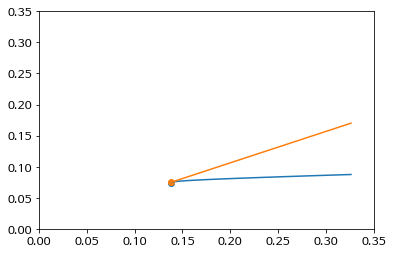

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p8 = []
for i in range(len(risks_p8)):
    ys_p8.append(max_tangency_p8 * risks_p8[i] + rf_rate)

plt.plot(risks_p8, rets_p8)
plt.plot(risks_p8, ys_p8)
plt.scatter(min_risk_p8, min_risk_ret_p8)
plt.scatter(max_tangency_risk_p8, max_tangency_return_p8)
plt.xlim([0, 0.35])
plt.ylim([0, 0.35])
plt.show()

### p9

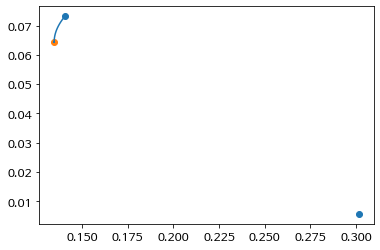

In [ ]:
#p9
holding_periods=1
n_term=252

returns_p9 = p9.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p9.fillna(0.005/365, inplace=True)
exp_rets_p9 = returns_p9.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p9 = returns_p9.cov() * n_term # covariance
corr_mat_p9 = returns_p9.corr() # corr

max_risk=0.5
max_ret_p9 = exp_rets_p9.max()
min_ret_p9 = exp_rets_p9[exp_rets_p9 > 0].min()

n_step = 100
step_diff = (max_ret_p9 - min_ret_p9)/n_step

risks_p9 = []
rets_p9 = []
weights_p9 = []

for step in range(0, n_step+1):
    target_ret_p9 = min_ret_p9 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p9, exp_rets_p9, target_ret_p9) # 최적화를 돌려서 나온 _w임.
    risk_p9 = np.sqrt(np.dot(np.dot(_w, cov_mat_p9), _w))

    if risk_p9 > max_risk:
        break

    risks_p9.append(risk_p9)
    ret_p9 = np.dot(exp_rets_p9, _w)
    rets_p9.append(ret_p9)
    weights_p9.append(_w)

# min_risk_ret
min_risk_idx_p9 = np.argmin(risks_p9)
min_risk_p9 = risks_p9[min_risk_idx_p9]
min_risk_ret_p9 = rets_p9[min_risk_idx_p9]

# efficient frontier & min_risk_ret
plt.plot(risks_p9, rets_p9)

var_p9 = np.diag(cov_mat_p9)
plt.scatter(np.sqrt(var_p9), exp_rets_p9)
plt.scatter(min_risk_p9, min_risk_ret_p9)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p9 = []

# ToDo
for i in range(len(rets_p9)):
    slope_ = (rets_p9[i] - rf_rate) / risks_p9[i]
    slopes_p9.append(slope_)

max_tangency_idx_p9 = np.argmax(slopes_p9)
max_tangency_p9 = slopes_p9[max_tangency_idx_p9]

max_tangency_risk_p9 = risks_p9[max_tangency_idx_p9]
max_tangency_return_p9 = rets_p9[max_tangency_idx_p9]
max_tangency_weight_p9 = weights_p9[max_tangency_idx_p9]

print("Risk of tangency portfolio : ", max_tangency_risk_p9)
print("Return of tangency portfolio : ", max_tangency_return_p9)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p9 - rf_rate) / max_tangency_risk_p9)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p9)

Risk of tangency portfolio :  0.14062695044379148
Return of tangency portfolio :  0.07317203917438939
Sharpe ratio of tangency portfolio :  0.4847722215354283
Weight of minimum variance portfolio : 
ARIRANG 고배당주      1.000000e+00
TIGER 200 헬스케어    4.763709e-10
dtype: float64


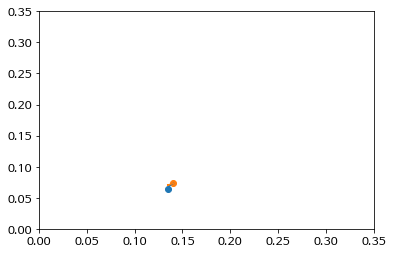

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p9 = []
for i in range(len(risks_p9)):
    ys_p9.append(max_tangency_p9 * risks_p9[i] + rf_rate)

plt.plot(risks_p9, rets_p9)
plt.plot(risks_p9, ys_p9)
plt.scatter(min_risk_p9, min_risk_ret_p9)
plt.scatter(max_tangency_risk_p9, max_tangency_return_p9)
plt.xlim([0, 0.35])
plt.ylim([0, 0.35])
plt.show()

### p10

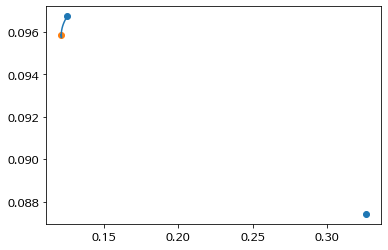

In [ ]:
#p10
holding_periods=1
n_term=252

returns_p10 = p10.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p10.fillna(0.005/365, inplace=True)
exp_rets_p10 = returns_p10.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p10 = returns_p10.cov() * n_term # covariance
corr_mat_p10 = returns_p10.corr() # corr

max_risk=0.5
max_ret_p10 = exp_rets_p10.max()
min_ret_p10 = exp_rets_p10[exp_rets_p10 > 0].min()

n_step = 100
step_diff = (max_ret_p10 - min_ret_p10)/n_step

risks_p10 = []
rets_p10 = []
weights_p10 = []

for step in range(0, n_step+1):
    target_ret_p10 = min_ret_p10 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p10, exp_rets_p10, target_ret_p10) # 최적화를 돌려서 나온 _w임.
    risk_p10 = np.sqrt(np.dot(np.dot(_w, cov_mat_p10), _w))

    if risk_p10 > max_risk:
        break

    risks_p10.append(risk_p10)
    ret_p10 = np.dot(exp_rets_p10, _w)
    rets_p10.append(ret_p10)
    weights_p10.append(_w)

# min_risk_ret
min_risk_idx_p10 = np.argmin(risks_p10)
min_risk_p10 = risks_p10[min_risk_idx_p10]
min_risk_ret_p10 = rets_p10[min_risk_idx_p10]

# efficient frontier & min_risk_ret
plt.plot(risks_p10, rets_p10)

var_p10 = np.diag(cov_mat_p10)
plt.scatter(np.sqrt(var_p10), exp_rets_p10)
plt.scatter(min_risk_p10, min_risk_ret_p10)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p10 = []

# ToDo
for i in range(len(rets_p10)):
    slope_ = (rets_p10[i] - rf_rate) / risks_p10[i]
    slopes_p10.append(slope_)

max_tangency_idx_p10 = np.argmax(slopes_p10)
max_tangency_p10 = slopes_p10[max_tangency_idx_p10]

max_tangency_risk_p10 = risks_p10[max_tangency_idx_p10]
max_tangency_return_p10 = rets_p10[max_tangency_idx_p10]
max_tangency_weight_p10 = weights_p10[max_tangency_idx_p10]

print("Risk of tangency portfolio : ", max_tangency_risk_p10)
print("Return of tangency portfolio : ", max_tangency_return_p10)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p10 - rf_rate) / max_tangency_risk_p10)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p10)

Risk of tangency portfolio :  0.12129763741230519
Return of tangency portfolio :  0.09599596126391356
Sharpe ratio of tangency portfolio :  0.7501874167145349
Weight of minimum variance portfolio : 
ARIRANG 미국다우존스고배당주(합성 H)    0.92
TIGER 헬스케어                  0.08
dtype: float64


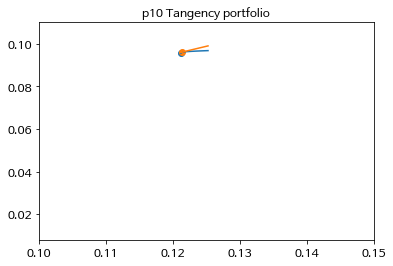

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p10 = []
for i in range(len(risks_p10)):
    ys_p10.append(max_tangency_p10 * risks_p10[i] + rf_rate)

plt.rc('font', size=12)
plt.plot(risks_p10, rets_p10)
plt.plot(risks_p10, ys_p10)
plt.scatter(min_risk_p10, min_risk_ret_p10)
plt.scatter(max_tangency_risk_p10, max_tangency_return_p10)
plt.xlim([0.1, 0.15])
plt.ylim([0.008, 0.11])
plt.title("p10 Tangency portfolio",fontsize=12)
plt.show()

### p11

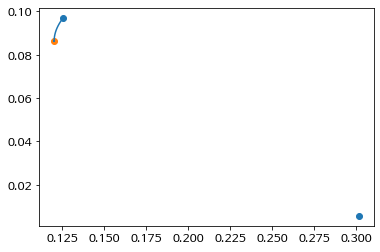

In [ ]:
#p11
holding_periods=1
n_term=252

returns_p11 = p11.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p11.fillna(0.005/365, inplace=True)
exp_rets_p11 = returns_p11.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p11 = returns_p11.cov() * n_term # covariance
corr_mat_p11 = returns_p11.corr() # corr

max_risk=0.5
max_ret_p11 = exp_rets_p11.max()
min_ret_p11 = exp_rets_p11[exp_rets_p11 > 0].min()

n_step = 100
step_diff = (max_ret_p11 - min_ret_p11)/n_step

risks_p11 = []
rets_p11 = []
weights_p11 = []

for step in range(0, n_step+1):
    target_ret_p11 = min_ret_p11 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p11, exp_rets_p11, target_ret_p11) # 최적화를 돌려서 나온 _w임.
    risk_p11 = np.sqrt(np.dot(np.dot(_w, cov_mat_p11), _w))

    if risk_p11 > max_risk:
        break

    risks_p11.append(risk_p11)
    ret_p11 = np.dot(exp_rets_p11, _w)
    rets_p11.append(ret_p11)
    weights_p11.append(_w)

# min_risk_ret
min_risk_idx_p11 = np.argmin(risks_p11)
min_risk_p11 = risks_p11[min_risk_idx_p11]
min_risk_ret_p11 = rets_p11[min_risk_idx_p11]

# efficient frontier & min_risk_ret
plt.plot(risks_p11, rets_p11)

var_p11 = np.diag(cov_mat_p11)
plt.scatter(np.sqrt(var_p11), exp_rets_p11)
plt.scatter(min_risk_p11, min_risk_ret_p11)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p11 = []

# ToDo
for i in range(len(rets_p11)):
    slope_ = (rets_p11[i] - rf_rate) / risks_p11[i]
    slopes_p11.append(slope_)

max_tangency_idx_p11 = np.argmax(slopes_p11)
max_tangency_p11 = slopes_p11[max_tangency_idx_p11]

max_tangency_risk_p11 = risks_p11[max_tangency_idx_p11]
max_tangency_return_p11 = rets_p11[max_tangency_idx_p11]
max_tangency_weight_p11 = weights_p11[max_tangency_idx_p11]

print("Risk of tangency portfolio : ", max_tangency_risk_p11)
print("Return of tangency portfolio : ", max_tangency_return_p11)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p11 - rf_rate) / max_tangency_risk_p11)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p11)

Risk of tangency portfolio :  0.12524838979943867
Return of tangency portfolio :  0.09674220618568281
Sharpe ratio of tangency portfolio :  0.7324821207888612
Weight of minimum variance portfolio : 
ARIRANG 미국다우존스고배당주(합성 H)    1.000000e+00
TIGER 200 헬스케어             -1.074361e-10
dtype: float64


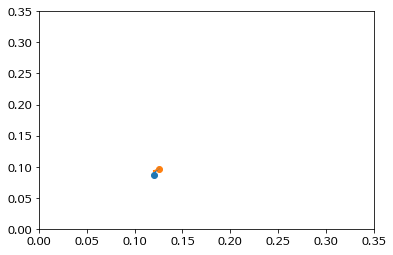

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p11 = []
for i in range(len(risks_p11)):
    ys_p11.append(max_tangency_p11 * risks_p11[i] + rf_rate)

plt.plot(risks_p11, rets_p11)
plt.plot(risks_p11, ys_p11)
plt.scatter(min_risk_p11, min_risk_ret_p11)
plt.scatter(max_tangency_risk_p11, max_tangency_return_p11)
plt.xlim([0, 0.35])
plt.ylim([0, 0.35])
plt.show()

### p12

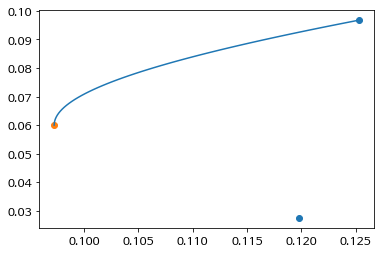

In [ ]:
#p12
holding_periods=1
n_term=252

returns_p12 = p12.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p12.fillna(0.005/365, inplace=True)
exp_rets_p12 = returns_p12.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p12 = returns_p12.cov() * n_term # covariance
corr_mat_p12 = returns_p12.corr() # corr

max_risk=0.5
max_ret_p12 = exp_rets_p12.max()
min_ret_p12 = exp_rets_p12[exp_rets_p12 > 0].min()

n_step = 100
step_diff = (max_ret_p12 - min_ret_p12)/n_step

risks_p12 = []
rets_p12 = []
weights_p12 = []

for step in range(0, n_step+1):
    target_ret_p12 = min_ret_p12 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p12, exp_rets_p12, target_ret_p12) # 최적화를 돌려서 나온 _w임.
    risk_p12 = np.sqrt(np.dot(np.dot(_w, cov_mat_p12), _w))

    if risk_p12 > max_risk:
        break

    risks_p12.append(risk_p12)
    ret_p12 = np.dot(exp_rets_p12, _w)
    rets_p12.append(ret_p12)
    weights_p12.append(_w)

# min_risk_ret
min_risk_idx_p12 = np.argmin(risks_p12)
min_risk_p12 = risks_p12[min_risk_idx_p12]
min_risk_ret_p12 = rets_p12[min_risk_idx_p12]

# efficient frontier & min_risk_ret
plt.plot(risks_p12, rets_p12)

var_p12 = np.diag(cov_mat_p12)
plt.scatter(np.sqrt(var_p12), exp_rets_p12)
plt.scatter(min_risk_p12, min_risk_ret_p12)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p12 = []

# ToDo
for i in range(len(rets_p12)):
    slope_ = (rets_p12[i] - rf_rate) / risks_p12[i]
    slopes_p12.append(slope_)

max_tangency_idx_p12 = np.argmax(slopes_p12)
max_tangency_p12 = slopes_p12[max_tangency_idx_p12]

max_tangency_risk_p12 = risks_p12[max_tangency_idx_p12]
max_tangency_return_p12 = rets_p12[max_tangency_idx_p12]
max_tangency_weight_p12 = weights_p12[max_tangency_idx_p12]

print("Risk of tangency portfolio : ", max_tangency_risk_p12)
print("Return of tangency portfolio : ", max_tangency_return_p12)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p12 - rf_rate) / max_tangency_risk_p12)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p12)

Risk of tangency portfolio :  0.12524838974700014
Return of tangency portfolio :  0.09674220614422253
Sharpe ratio of tangency portfolio :  0.7324821207645096
Weight of minimum variance portfolio : 
ARIRANG 미국다우존스고배당주(합성 H)    1.000000e+00
흥국 S&P코리아로우볼                4.574090e-10
dtype: float64


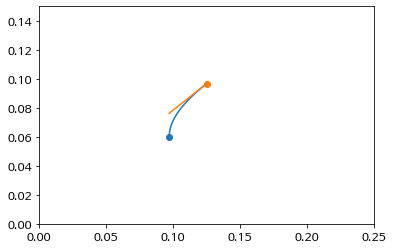

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p12 = []
for i in range(len(risks_p12)):
    ys_p12.append(max_tangency_p12 * risks_p12[i] + rf_rate)

plt.plot(risks_p12, rets_p12)
plt.plot(risks_p12, ys_p12)
plt.scatter(min_risk_p12, min_risk_ret_p12)
plt.scatter(max_tangency_risk_p12, max_tangency_return_p12)
plt.xlim([0, 0.25])
plt.ylim([0, 0.15])
plt.show()

### p13

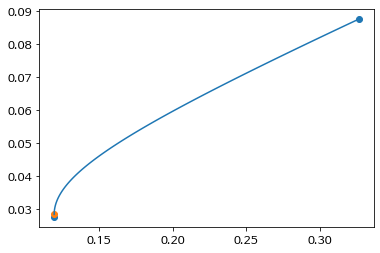

In [ ]:
#p13
holding_periods=1
n_term=252

returns_p13 = p13.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p13.fillna(0.005/365, inplace=True)
exp_rets_p13 = returns_p13.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p13 = returns_p13.cov() * n_term # covariance
corr_mat_p13 = returns_p13.corr() # corr

max_risk=0.5
max_ret_p13 = exp_rets_p13.max()
min_ret_p13 = exp_rets_p13[exp_rets_p13 > 0].min()

n_step = 100
step_diff = (max_ret_p13 - min_ret_p13)/n_step

risks_p13 = []
rets_p13 = []
weights_p13 = []

for step in range(0, n_step+1):
    target_ret_p13 = min_ret_p13 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p13, exp_rets_p13, target_ret_p13) # 최적화를 돌려서 나온 _w임.
    risk_p13 = np.sqrt(np.dot(np.dot(_w, cov_mat_p13), _w))

    if risk_p13 > max_risk:
        break

    risks_p13.append(risk_p13)
    ret_p13 = np.dot(exp_rets_p13, _w)
    rets_p13.append(ret_p13)
    weights_p13.append(_w)

# min_risk_ret
min_risk_idx_p13 = np.argmin(risks_p13)
min_risk_p13 = risks_p13[min_risk_idx_p13]
min_risk_ret_p13 = rets_p13[min_risk_idx_p13]

# efficient frontier & min_risk_ret
plt.plot(risks_p13, rets_p13)

var_p13 = np.diag(cov_mat_p13)
plt.scatter(np.sqrt(var_p13), exp_rets_p13)
plt.scatter(min_risk_p13, min_risk_ret_p13)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p13 = []

# ToDo
for i in range(len(rets_p13)):
    slope_ = (rets_p13[i] - rf_rate) / risks_p13[i]
    slopes_p13.append(slope_)

max_tangency_idx_p13 = np.argmax(slopes_p13)
max_tangency_p13 = slopes_p13[max_tangency_idx_p13]

max_tangency_risk_p13 = risks_p13[max_tangency_idx_p13]
max_tangency_return_p13 = rets_p13[max_tangency_idx_p13]
max_tangency_weight_p13 = weights_p13[max_tangency_idx_p13]

print("Risk of tangency portfolio : ", max_tangency_risk_p13)
print("Return of tangency portfolio : ", max_tangency_return_p13)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p13 - rf_rate) / max_tangency_risk_p13)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p13)

Risk of tangency portfolio :  0.16879486474226205
Return of tangency portfolio :  0.05146169841229488
Sharpe ratio of tangency portfolio :  0.27525540236806756
Weight of minimum variance portfolio : 
TIGER 헬스케어      0.4
흥국 S&P코리아로우볼    0.6
dtype: float64


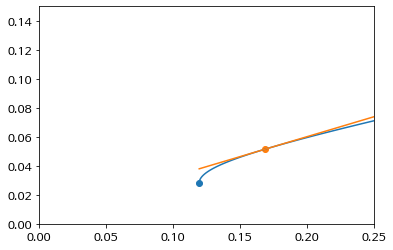

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p13 = []
for i in range(len(risks_p13)):
    ys_p13.append(max_tangency_p13 * risks_p13[i] + rf_rate)

plt.plot(risks_p13, rets_p13)
plt.plot(risks_p13, ys_p13)
plt.scatter(min_risk_p13, min_risk_ret_p13)
plt.scatter(max_tangency_risk_p13, max_tangency_return_p13)
plt.xlim([0, 0.25])
plt.ylim([0, 0.15])
plt.show()

### p14

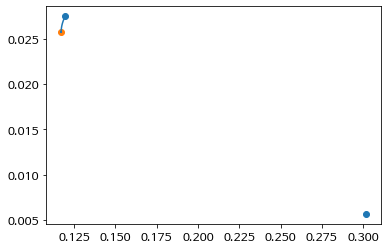

In [ ]:
#p14
holding_periods=1
n_term=252

returns_p14 = p14.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
returns_p14.fillna(0.005/365, inplace=True)
exp_rets_p14 = returns_p14.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat_p14 = returns_p14.cov() * n_term # covariance
corr_mat_p14 = returns_p14.corr() # corr

max_risk=0.5
max_ret_p14 = exp_rets_p14.max()
min_ret_p14 = exp_rets_p14[exp_rets_p14 > 0].min()

n_step = 100
step_diff = (max_ret_p14 - min_ret_p14)/n_step

risks_p14 = []
rets_p14 = []
weights_p14 = []

for step in range(0, n_step+1):
    target_ret_p14 = min_ret_p14 + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_p14, exp_rets_p14, target_ret_p14) # 최적화를 돌려서 나온 _w임.
    risk_p14 = np.sqrt(np.dot(np.dot(_w, cov_mat_p14), _w))

    if risk_p14 > max_risk:
        break

    risks_p14.append(risk_p14)
    ret_p14 = np.dot(exp_rets_p14, _w)
    rets_p14.append(ret_p14)
    weights_p14.append(_w)

# min_risk_ret
min_risk_idx_p14 = np.argmin(risks_p14)
min_risk_p14 = risks_p14[min_risk_idx_p14]
min_risk_ret_p14 = rets_p14[min_risk_idx_p14]

# efficient frontier & min_risk_ret
plt.plot(risks_p14, rets_p14)

var_p14 = np.diag(cov_mat_p14)
plt.scatter(np.sqrt(var_p14), exp_rets_p14)
plt.scatter(min_risk_p14, min_risk_ret_p14)

plt.show()

In [ ]:
# tangency portfolio
rf_rate = 0.005

slopes_p14 = []

# ToDo
for i in range(len(rets_p14)):
    slope_ = (rets_p14[i] - rf_rate) / risks_p14[i]
    slopes_p14.append(slope_)

max_tangency_idx_p14 = np.argmax(slopes_p14)
max_tangency_p14 = slopes_p14[max_tangency_idx_p14]

max_tangency_risk_p14 = risks_p14[max_tangency_idx_p14]
max_tangency_return_p14 = rets_p14[max_tangency_idx_p14]
max_tangency_weight_p14 = weights_p14[max_tangency_idx_p14]

print("Risk of tangency portfolio : ", max_tangency_risk_p14)
print("Return of tangency portfolio : ", max_tangency_return_p14)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_p14 - rf_rate) / max_tangency_risk_p14)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_p14)

Risk of tangency portfolio :  0.11974670990232517
Return of tangency portfolio :  0.027493415840052802
Sharpe ratio of tangency portfolio :  0.18784161885032333
Weight of minimum variance portfolio : 
TIGER 200 헬스케어    1.266127e-10
흥국 S&P코리아로우볼      1.000000e+00
dtype: float64


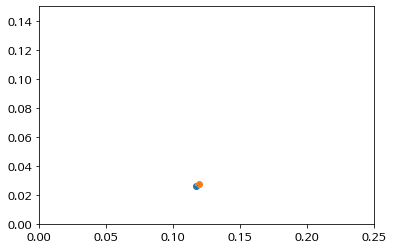

In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys_p14 = []
for i in range(len(risks_p14)):
    ys_p14.append(max_tangency_p14 * risks_p14[i] + rf_rate)

plt.plot(risks_p14, rets_p14)
plt.plot(risks_p14, ys_p14)
plt.scatter(min_risk_p14, min_risk_ret_p14)
plt.scatter(max_tangency_risk_p14, max_tangency_return_p14)
plt.xlim([0, 0.25])
plt.ylim([0, 0.15])
plt.show()

# 3. 최적 포트폴리오
- risk-expected return & risk - sharpe ratio이 높은 p10, p14

In [ ]:
group = ['p1', 'p2', 'p3' ,'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14']
max_tangency_risk_group = [max_tangency_risk_p1, max_tangency_risk_p2, max_tangency_risk_p3, max_tangency_risk_p4, max_tangency_risk_p5, max_tangency_risk_p6, max_tangency_risk_p7, max_tangency_risk_p8, max_tangency_risk_p9, 
                           max_tangency_risk_p10, max_tangency_risk_p11, max_tangency_risk_p12, max_tangency_risk_p13, max_tangency_risk_p14]
max_tangency_return_group = [max_tangency_return_p1, max_tangency_return_p2, max_tangency_return_p3, max_tangency_return_p4, max_tangency_return_p5, max_tangency_return_p6, max_tangency_return_p7, max_tangency_return_p8, max_tangency_return_p9, 
                           max_tangency_return_p10, max_tangency_return_p11, max_tangency_return_p12, max_tangency_return_p13, max_tangency_return_p14]
sharpe_ratio_group = [(max_tangency_return_p1 - rf_rate) / max_tangency_risk_p1, (max_tangency_return_p2 - rf_rate) / max_tangency_risk_p2, (max_tangency_return_p3 - rf_rate) / max_tangency_risk_p3, (max_tangency_return_p4 - rf_rate) / max_tangency_risk_p4,
                    (max_tangency_return_p5 - rf_rate) / max_tangency_risk_p5, (max_tangency_return_p6 - rf_rate) / max_tangency_risk_p6, (max_tangency_return_p7 - rf_rate) / max_tangency_risk_p7, (max_tangency_return_p8 - rf_rate) / max_tangency_risk_p8,
                    (max_tangency_return_p9 - rf_rate) / max_tangency_risk_p9, (max_tangency_return_p10 - rf_rate) / max_tangency_risk_p10,(max_tangency_return_p11 - rf_rate) / max_tangency_risk_p11, (max_tangency_return_p12 - rf_rate) / max_tangency_risk_p12,
                    (max_tangency_return_p13 - rf_rate) / max_tangency_risk_p13, (max_tangency_return_p14 - rf_rate) / max_tangency_risk_p14]

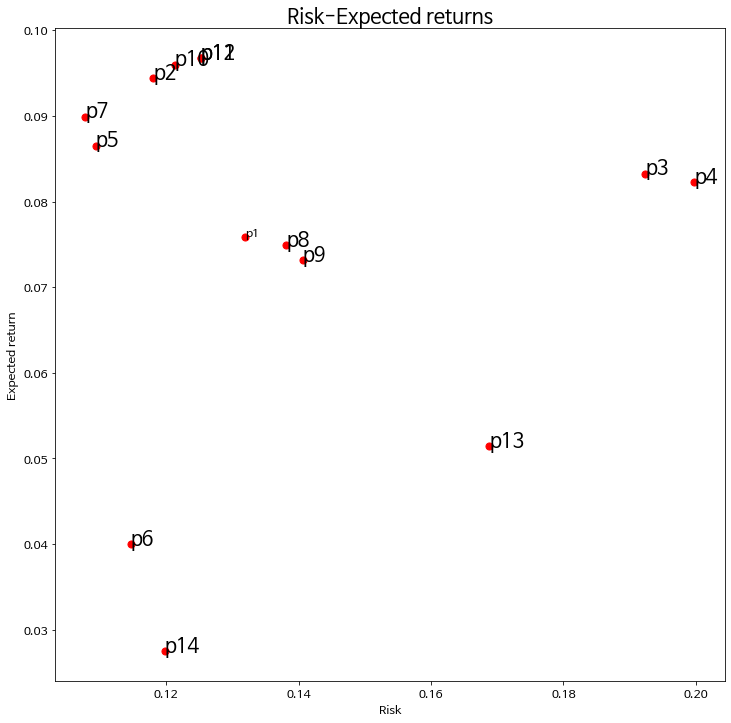

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(max_tangency_risk_group, max_tangency_return_group ,s=50,color="red")
plt.xlabel("Risk")
plt.ylabel("Expected return")
plt.title("Risk-Expected returns",fontsize=20)

for i, label in enumerate(group):
    plt.text(max_tangency_risk_group[i], max_tangency_return_group[i],label)
    plt.rc('font', size=20)

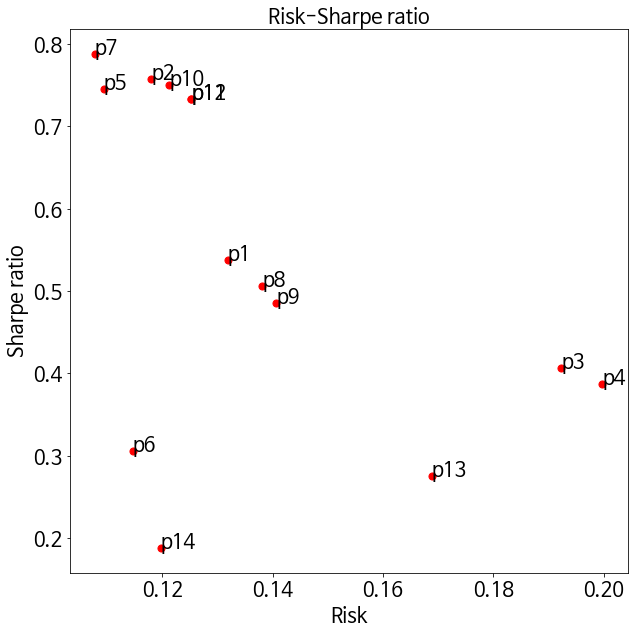

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(max_tangency_risk_group, sharpe_ratio_group ,s=50,color="red")
plt.xlabel("Risk")
plt.ylabel("Sharpe ratio")
plt.title("Risk-Sharpe ratio",fontsize=20)

for i, label in enumerate(group):
    plt.text(max_tangency_risk_group[i], sharpe_ratio_group[i],label)
    plt.rc('font', size=20)

<Figure size 1080x1080 with 0 Axes>

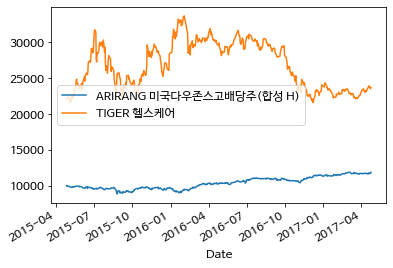

In [ ]:
# p10
plt.rc('font', size=12)
plt.figure(figsize=(15,15))
p10.plot()

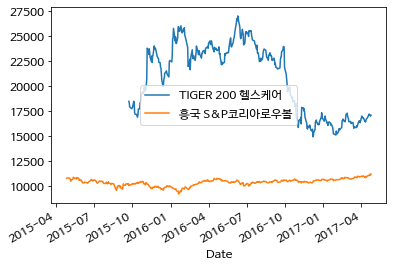

In [ ]:
p14.plot()

# 4. 백테스팅

In [ ]:
back_data = price[['ARIRANG 미국다우존스고배당주(합성 H)', 'TIGER 헬스케어']]

In [ ]:
rf=price['KOSEF 단기자금']

In [ ]:
back_data = back_data['2017-04-26':]

In [ ]:
rf=rf['2017-04-26':]

In [ ]:
back_data

,ARIRANG 미국다우존스고배당주(합성 H),TIGER 헬스케어
Date,,
2017-04-26,11925,23608
2017-04-27,11870,23618
2017-04-28,11865,23578
2017-05-02,11725,23503
2017-05-04,11725,23703
...,...,...
2019-04-22,13240,35725
2019-04-23,13200,35680
2019-04-24,13280,35125


In [ ]:
rf

Date
2017-04-26     98225
2017-04-27     98245
2017-04-28     98254
2017-05-02     98269
2017-05-04     98284
               ...  
2019-04-22    101325
2019-04-23    101330
2019-04-24    101335
2019-04-25    101350
2019-04-26    101345
Name: KOSEF 단기자금, Length: 487, dtype: object

In [ ]:
ret_rf=rf.pct_change()

In [ ]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]
    
    returns = result
    avg_rets = returns.mean()*12
    cov_mat = returns.cov()*12

    return returns, cov_mat, avg_rets

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))


    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1, (1, n))
    b = opt.matrix(1)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.01):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/100
    for i in range(100):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights


In [ ]:
back_data = back_data.dropna()

In [ ]:
ret = back_data.pct_change().iloc[1:]

In [ ]:
back_data.shape

(487, 2)

In [ ]:
def back_test(data, ret):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 60 # 3개월에 한번 = 분기당 한번
    window_size = 120 # 지난 6개월

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = (total_days - window_size) // rebalance_period
    w = []
    rebalancing_date=[]
    original_weights = []
    
    rebal = 60
    for i in range(window_size, total_days):
        # 리밸런싱을 할 때 마다 Tangency portfolio weight를 새로 구해야 한다.
        # 이때 리밸런싱 시점 이전의 총 120일 간의 데이터를 사용한다.
        
        if rebal % rebalance_period == 0:
            #print('rebalance')
            _returns, _cov_mat, _avg_rets= create_data(data[(i-window_size):i])
            rebalancing_date.append(data.index[i:i+1]) # rebalance_period 씩 늘려가자
            rebal = 0
            _target_ret = _avg_rets.quantile(0.7)
            _min_ret = _avg_rets.min()
            _max_ret = _avg_rets.max()
            _w = tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret)
            print(n_rebalance)
            n_rebalance = n_rebalance - 1
            print(_w)
            _w.plot.bar()
            plt.show()
            plt.close()
            _w = np.asarray(_w.values) #np.array([0.0, 0.0, 1.0, 0.0, 0.0])
            w.append(_w)
            

        rebal = rebal + 1
        
    
    price = data
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_each_money = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    rebal = 60
    j = 0
    for i in range(window_size, total_days):
        
        if i == window_size: # 초기화
            port_each_money = portfolio_value * w[j]
            rebal = 1
            # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
            portfolio_value = port_each_money.sum()
            # port에 portfolio_value를 저장하여 준다.
            port.append(portfolio_value)
            j = j+1


        else:
            #각 날마다 자산의 가격이 바뀌므로, port_each_money 변화한다.
            port_each_money = port_each_money * (1+ret.iloc[i])
            portfolio_value = port_each_money.sum()
            if rebal % rebalance_period == 0:
                rebal = 0
                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_each_money = portfolio_value * w[j]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                j = j+1
            
            else:
                # 리밸런싱 날짜가 아닌 평범함 날짜. 
                # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
            
        rebal = rebal + 1
        port_date.append(data.index[i:i+1][0])
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, rebalancing_date

In [ ]:
back_data

,ARIRANG 미국다우존스고배당주(합성 H),TIGER 헬스케어
Date,,
2017-04-26,11925,23608
2017-04-27,11870,23618
2017-04-28,11865,23578
2017-05-02,11725,23503
2017-05-04,11725,23703
...,...,...
2019-04-22,13240,35725
2019-04-23,13200,35680
2019-04-24,13280,35125


In [ ]:
ret

,ARIRANG 미국다우존스고배당주(합성 H),TIGER 헬스케어
Date,,
2017-04-27,-0.004612,0.000424
2017-04-28,-0.000421,-0.001694
2017-05-02,-0.011799,-0.003181
2017-05-04,0.000000,0.008510
2017-05-08,0.005544,0.038561
...,...,...
2019-04-22,0.000000,0.005347
2019-04-23,-0.003021,-0.001260
2019-04-24,0.006061,-0.015555


In [ ]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
w, portfolio, rebalancing_date = back_test(back_data[1:], ret)

6
ARIRANG 미국다우존스고배당주(합성 H)    0.01
TIGER 헬스케어                  0.99
dtype: float64
5
ARIRANG 미국다우존스고배당주(합성 H)    0.869999
TIGER 헬스케어                  0.130001
dtype: float64
4
ARIRANG 미국다우존스고배당주(합성 H)    0.01
TIGER 헬스케어                  0.99
dtype: float64
3
ARIRANG 미국다우존스고배당주(합성 H)    0.99
TIGER 헬스케어                  0.01
dtype: float64
2
ARIRANG 미국다우존스고배당주(합성 H)    9.999999e-01
TIGER 헬스케어                  1.448365e-07
dtype: float64
1
ARIRANG 미국다우존스고배당주(합성 H)    0.01
TIGER 헬스케어                  0.99
dtype: float64
0
ARIRANG 미국다우존스고배당주(합성 H)    0.59004
TIGER 헬스케어                  0.40996
dtype: float64


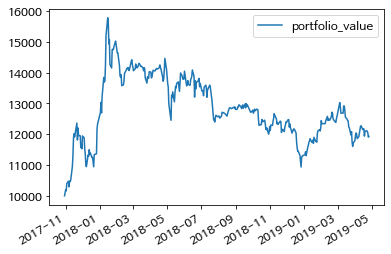

In [ ]:
portfolio.plot()

In [ ]:
portfolio

,portfolio_value
2017-10-30,10000.000000
2017-10-31,10090.892520
2017-11-01,10197.933439
2017-11-02,10159.755670
2017-11-03,10398.436736
...,...
2019-04-22,12118.682706
2019-04-23,12091.021364
2019-04-24,12054.601746
2019-04-25,11906.189102


In [ ]:
rfrf=(1+ret_rf) * 10000

In [ ]:
rfrf

Date
2017-04-26             NaN
2017-04-27    10002.036142
2017-04-28    10000.916077
2017-05-02    10001.526655
2017-05-04    10001.526422
                  ...     
2019-04-22    10000.987021
2019-04-23    10000.493462
2019-04-24    10000.493437
2019-04-25    10001.480239
2019-04-26     9999.506660
Name: KOSEF 단기자금, Length: 487, dtype: float64

In [ ]:
rfrf=pd.DataFrame(rfrf['2017-10-30':])

In [ ]:
df = pd.concat([portfolio, rfrf], axis=1)
df

,portfolio_value,KOSEF 단기자금
2017-10-30,10000.000000,9998.987690
2017-10-31,10090.892520,10000.506206
2017-11-01,10197.933439,10000.506180
2017-11-02,10159.755670,10001.518465
2017-11-03,10398.436736,9999.493922
...,...,...
2019-04-22,12118.682706,10000.987021
2019-04-23,12091.021364,10000.493462
2019-04-24,12054.601746,10000.493437
2019-04-25,11906.189102,10001.480239


In [ ]:
# 무위험 자산의 비중은 0.3으로 고정시킨다
portfolio = pd.DataFrame(df.iloc[:, 0]*0.7 + df.iloc[:,1]*0.3)
portfolio

,0
2017-10-30,9999.696307
2017-10-31,10063.776626
2017-11-01,10138.705261
2017-11-02,10112.284509
2017-11-03,10278.753892
...,...
2019-04-22,11483.374000
2019-04-23,11463.862993
2019-04-24,11438.369253
2019-04-25,11334.776443


In [ ]:
back_data_2 = price[['ARIRANG 미국다우존스고배당주(합성 H)', 'TIGER 헬스케어', 'KOSEF 단기자금']]
back_data_2 = back_data_2['2017-04-26':]

In [ ]:
back_data_2

,ARIRANG 미국다우존스고배당주(합성 H),TIGER 헬스케어,KOSEF 단기자금
Date,,,
2017-04-26,11925,23608,98225
2017-04-27,11870,23618,98245
2017-04-28,11865,23578,98254
2017-05-02,11725,23503,98269
2017-05-04,11725,23703,98284
...,...,...,...
2019-04-22,13240,35725,101325
2019-04-23,13200,35680,101330
2019-04-24,13280,35125,101335


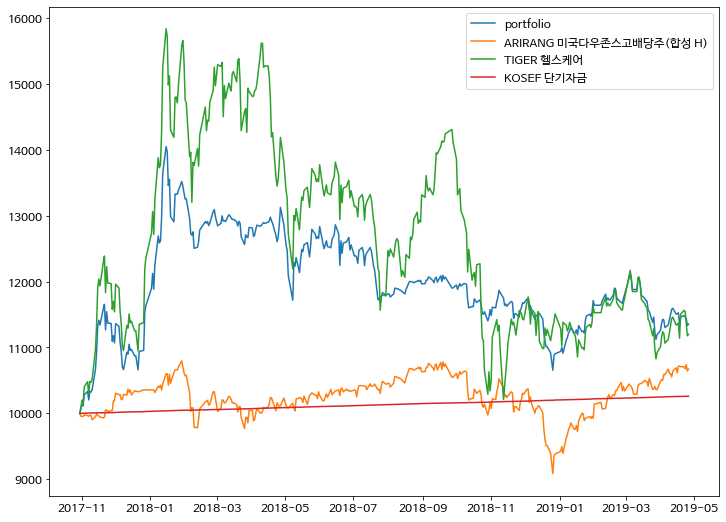

In [ ]:
# Backtest Result Plotting
plt.figure(figsize=(12,9))
plt.rc('font', size=12)
plt.plot(portfolio, label="portfolio")

for symbol in back_data_2.columns:
    plt.plot(back_data_2[121:][symbol] * 10000 / back_data_2[121:][symbol][0], label='{}'.format(symbol))

plt.legend()
plt.show()

In [ ]:
portfolio.values[0][0]

9999.696307094266

In [ ]:
# Final Value of Portfolio
portfolio.values[-1][0]

11354.176128293133